In [1]:
library(Seurat)
library(umap)
library(dplyr)
library(Matrix)
library(ggplot2)
library(pheatmap)
library(monocle3)
library(circlize)
library(riverplot)
library(networkD3)
library(ggalluvial)
library(liger)
library(splines)
library(SeuratWrappers)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:Matrix’:

    which


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, 

# human neuron data

In [2]:
human <- ReadH5AD("/datb/share_tmp/bo_data/adata_wb_w34_new.h5ad")

Pulling expression matrices and metadata

Data is unscaled

Creating assay object

Storing X as raw and raw as counts

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
No variable feature expression found in h5ad file

No dimensional reduction information found

Assembling Seurat object

No nearest-neighbor graph

No additional layers found



In [3]:
human_meta = read.csv("/datb/share_tmp/bo_data/Liger_Luyufeng/wholebrainw34_raw_clusters.csv",
                              sep=",",stringsAsFactors=T,header=T,row.names = 1)
w345.meta <- read.csv("/datb/share_tmp/wholebody_w345_metadata.csv")
rownames(w345.meta) <- w345.meta[,1]

In [4]:
human <- AddMetaData(human, metadata = w345.meta)

In [5]:
human <- AddMetaData(human, metadata = human_meta)

In [6]:
head(human@meta.data)

batch week.stage nFeatures_RNA percent.mito nCount_RNA
AAACCTGAGAATGTTG-1-0-0 0     0          3476          0.037098102  14556     
AAACCTGAGCCAGAAC-1-0-0 0     0          3880          0.005319862  22369     
AAACCTGAGGCAGTCA-1-0-0 0     0          4646          0.001197492  31733     
AAACCTGAGGGATGGG-1-0-0 0     0          4258          0.014272256  21230     
AAACCTGAGTGACATA-1-0-0 0     0          3743          0.008267455  16571     
AAACCTGCAACACCTA-1-0-0 0     0          3597          0.006943654  17570     
                       louvain clusters3               
AAACCTGAGAATGTTG-1-0-0  3      H_Somitic_mesoderm      
AAACCTGAGCCAGAAC-1-0-0 12      H_Neural_epithelium     
AAACCTGAGGCAGTCA-1-0-0  3      H_Somitic_mesoderm      
AAACCTGAGGGATGGG-1-0-0  8      H_Lateral_plate_mesoderm
AAACCTGAGTGACATA-1-0-0  0      H_Chondrocyte           
AAACCTGCAACACCTA-1-0-0  0      H_Chondrocyte           
                       clusters                  clusters.new
AAACCTGAGAATGTTG-1-0-0 H_Somitic_mesoderm         3          
AAACCTGAGCCAGAAC-1-0-0 H_Neural_epithelium       12          
AAACCTGAGGCAGTCA-1-0-0 H_Somitic_mesoderm         3          
AAACCTGAGGGATGGG-1-0-0 H_Lateral_plate_mesoderm1  8          
AAACCTGAGTGACATA-1-0-0 H_Chondrocyte1             0          
AAACCTGCAACACCTA-1-0-0 H_Chondrocyte1             0          
                       index                  week_stage n_genes percent_mito
AAACCTGAGAATGTTG-1-0-0 AAACCTGAGAATGTTG-1-0-0 W3-1       3476    0.037098102 
AAACCTGAGCCAGAAC-1-0-0 AAACCTGAGCCAGAAC-1-0-0 W3-1       3880    0.005319862 
AAACCTGAGGCAGTCA-1-0-0 AAACCTGAGGCAGTCA-1-0-0 W3-1       4646    0.001197491 
AAACCTGAGGGATGGG-1-0-0 AAACCTGAGGGATGGG-1-0-0 W3-1       4258    0.014272256 
AAACCTGAGTGACATA-1-0-0 AAACCTGAGTGACATA-1-0-0 W3-1       3743    0.008267455 
AAACCTGCAACACCTA-1-0-0 AAACCTGCAACACCTA-1-0-0 W3-1       3597    0.006943654 
                       n_counts louvain1 louvain_lineage         
AAACCTGAGAATGTTG-1-0-0 14556     3       Presometic_progenitor   
AAACCTGAGCCAGAAC-1-0-0 22369    12       CNS_lineage             
AAACCTGAGGCAGTCA-1-0-0 31733     3       Presometic_progenitor   
AAACCTGAGGGATGGG-1-0-0 21230     8       Cardiac_mesoderm_lineage
AAACCTGAGTGACATA-1-0-0 16571     0       Skeletal_system_lineage 
AAACCTGCAACACCTA-1-0-0 17570     0       Skeletal_system_lineage 
                       Neural_clusters   clusters_new            
AAACCTGAGAATGTTG-1-0-0 other             3Somitic_mesoderm       
AAACCTGAGCCAGAAC-1-0-0 Neural epithelium 12Neural_epithelium     
AAACCTGAGGCAGTCA-1-0-0 other             3Somitic_mesoderm       
AAACCTGAGGGATGGG-1-0-0 other             8Lateral_plate_mesoderm1
AAACCTGAGTGACATA-1-0-0 other             0Chondrocyte1           
AAACCTGCAACACCTA-1-0-0 other             0Chondrocyte1

In [7]:
table(human@meta.data$louvain_lineage)


             Blood_lineage   Cardiac_mesoderm_lineage 
                       794                       8512 
               CNS_lineage           Endoderm_lineage 
                      9578                        731 
       Endothelium_lineage         Epithelium_lineage 
                      1766                       2882 
Intermediate_mesod_lineage          Microglia_lineage 
                      1012                        618 
           Myocyte_lineage                        NMP 
                      4420                        664 
             Pharygel_arch                PNS_lineage 
                      4179                       1909 
     Presometic_progenitor    Skeletal_system_lineage 
                      3858                       4429 

In [8]:
Idents(human) <- "louvain_lineage"
human_neuron <- subset(human,idents = c("CNS_lineage","PNS_lineage"))

In [9]:
Idents(human_neuron) <- "week_stage"
W3 <- subset(human_neuron,idents = "W3-1")
W4 <- subset(human_neuron,idents = "W4-1")

# mouse neuron data

In [10]:
mouse <- read.csv('/datb/share_tmp/bo_data/Liger_Luyufeng/Mouse_e85_e95_e105_raw_matrix.csv',
                           sep=",",stringsAsFactors=F,header=T,row.names=1)

In [11]:
mouse <- CreateSeuratObject(counts = mouse, project = "Mouse", min.cells = 0, min.features = 0)

In [12]:
mouse_meta1 = read.csv("/datb/share_tmp/bo_data/Liger_Luyufeng/Mouse_e85_e95_e105_raw_clusters.csv",
                               sep=",",stringsAsFactors=T,header=T,row.names = 1)

In [13]:
mouse_meta2 = read.csv("/datb/share_tmp/bo_data/Mouse_e85_e95_e15_louvain_clusters1_clusters2.csv",
                              sep=",",stringsAsFactors=T,header=T,row.names = 1)

In [14]:
rownames(mouse_meta1) <- make.names(rownames(mouse_meta1),unique = T)
rownames(mouse_meta2) <- make.names(rownames(mouse_meta2),unique = T)

In [15]:
all(rownames(mouse_meta1)==colnames(mouse))
all(rownames(mouse_meta2)==colnames(mouse))

[1] TRUE

[1] TRUE

In [16]:
mouse <- AddMetaData(mouse, metadata = mouse_meta1)
mouse <- AddMetaData(mouse, metadata = mouse_meta2)

In [17]:
mouse@meta.data$louvain_clusters <- paste0(mouse@meta.data$louvain,"",mouse@meta.data$clusters2)

In [18]:
Idents(mouse) <- "clusters2"
mouse_neuron <- subset(mouse,idents = c('M_Neural_epithelium', 'M_Radial_glia1', 'M_Radial_glia2', 'M_Radial_glia3', 'M_Radial_glia4', 'M_Neural_progenitor1', 'M_Neural_progenitor2','M_Neural_crest'))

In [19]:
Idents(mouse_neuron) <- "Day"
E85 <- subset(mouse_neuron,idents = "E85")
E95 <- subset(mouse_neuron,idents = "E95")
E105 <- subset(mouse_neuron,idents = "E105")

In [20]:
human_neuron

An object of class Seurat 
26110 features across 11487 samples within 1 assay 
Active assay: RNA (26110 features, 0 variable features)

In [21]:
mouse_neuron

An object of class Seurat 
18779 features across 17683 samples within 1 assay 
Active assay: RNA (18779 features, 0 variable features)

# CCA analysis

In [22]:
W3@meta.data$tech <- "w3"
W4@meta.data$tech <- "w4"
E85@meta.data$tech <- "E85"
E95@meta.data$tech <- "E95"
E105@meta.data$tech <- "E105"

In [23]:
obj <- merge(x=W3,y=c(W4,E85,E95,E105))

In [24]:
ch.list <- SplitObject(obj,split.by='tech')
ch.list

$w3
An object of class Seurat 
30757 features across 1660 samples within 1 assay 
Active assay: RNA (30757 features, 0 variable features)

$w4
An object of class Seurat 
30757 features across 9827 samples within 1 assay 
Active assay: RNA (30757 features, 0 variable features)

$E85
An object of class Seurat 
30757 features across 4086 samples within 1 assay 
Active assay: RNA (30757 features, 0 variable features)

$E95
An object of class Seurat 
30757 features across 7448 samples within 1 assay 
Active assay: RNA (30757 features, 0 variable features)

$E105
An object of class Seurat 
30757 features across 6149 samples within 1 assay 
Active assay: RNA (30757 features, 0 variable features)


In [25]:
for (i in 1:length(ch.list)) {
  ch.list[[i]] <- NormalizeData(ch.list[[i]], verbose = FALSE)
  ch.list[[i]] <- FindVariableFeatures(ch.list[[i]], selection.method = "vst", 
                                            nfeatures = 2000, verbose = FALSE)
}
ch.anchors <- FindIntegrationAnchors(object.list = ch.list, dims = 1:30)
ch.integrated <- IntegrateData(anchorset = ch.anchors, dims = 1:30)
DefaultAssay(ch.integrated) <- "integrated"

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6792 anchors

Filtering anchors

	Retained 2438 anchors

Extracting within-dataset neighbors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6308 anchors

Filtering anchors

	Retained 2066 anchors

Extracting within-dataset neighbors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 12420 anchors

Filtering anchors

	Retained 2636 anchors

Extracting within-dataset neighbors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 7078 anchors

Filtering anchors

	Retained 1481 anchors

Extracting within-dataset neighbors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 16468 anchors

Filtering anchors

	Retained 8321 anchors

Extracting within-dataset neighbors

Running CCA

Merging objects

Finding

In [26]:
ch.integrated <- ScaleData(ch.integrated, verbose = FALSE)
ch.integrated <- RunPCA(ch.integrated, npcs = 30, verbose = FALSE)

In [27]:
ch.integrated@meta.data$species <- ch.integrated@meta.data$tech
ch.integrated@meta.data$species <- plyr::mapvalues(ch.integrated@meta.data$species, from=c("E105","E85","E95",'w3','w4'), to =c("mouse",'mouse','mouse','human','human'))

In [28]:
ch.integrated <- RunUMAP(ch.integrated, dims = 1:15,min.dist = 0.3,reduction = "pca")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:10:55 UMAP embedding parameters a = 0.9922 b = 1.112

13:10:55 Read 29170 rows and found 15 numeric columns

13:10:55 Using Annoy for neighbor search, n_neighbors = 30

13:10:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

13:11:01 Writing NN index file to temp file /tmp/RtmpBNYDJf/file6b6ec4e8063c8

13:11:01 Searching Annoy index using 1 thread, search_k = 3000

13:11:14 Annoy recall = 100%

13:11:15 Commencing smooth kNN distance calibration using 1 thread

13:11:19 Initializing 

In [274]:
ch.integrated <- FindNeighbors(ch.integrated, reduction = "pca", dims = 1:15)
ch.integrated <- FindClusters(ch.integrated, resolution = 2)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 29170
Number of edges: 1000599

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8492
Number of communities: 44
Elapsed time: 4 seconds


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 29170
Number of edges: 1000599

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7917
Number of communities: 82
Elapsed time: 4 seconds


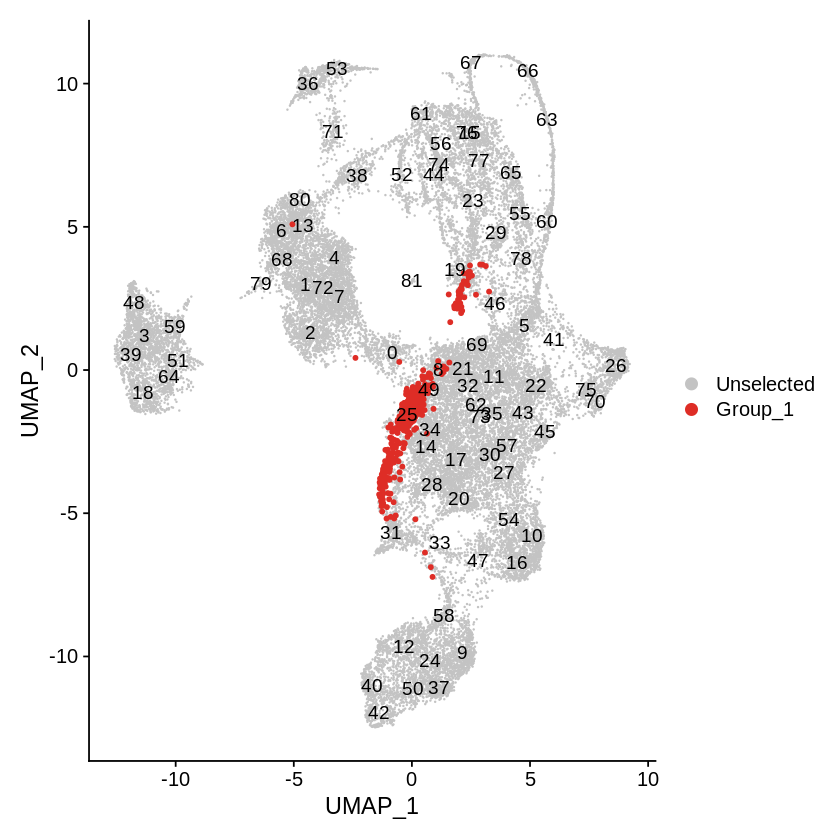

In [277]:
ch.integrated <- FindClusters(ch.integrated, resolution = 5)
DimPlot(ch.integrated, reduction = "umap", label = TRUE,cells.highlight = list((colnames(ch.integrated)[ch.integrated@meta.data$integrated_snn_res.5==25])))

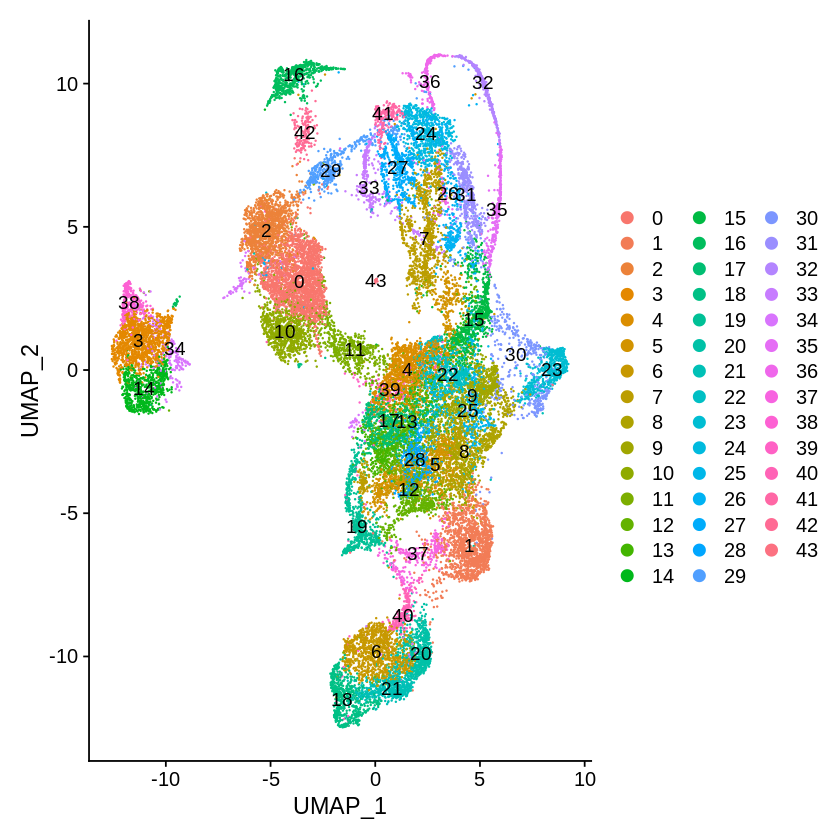

In [275]:
DimPlot(ch.integrated, reduction = "umap", label = TRUE,cols = c('#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
        '#c5b0d5','#ff9896', '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5',
       '#ad494a'))

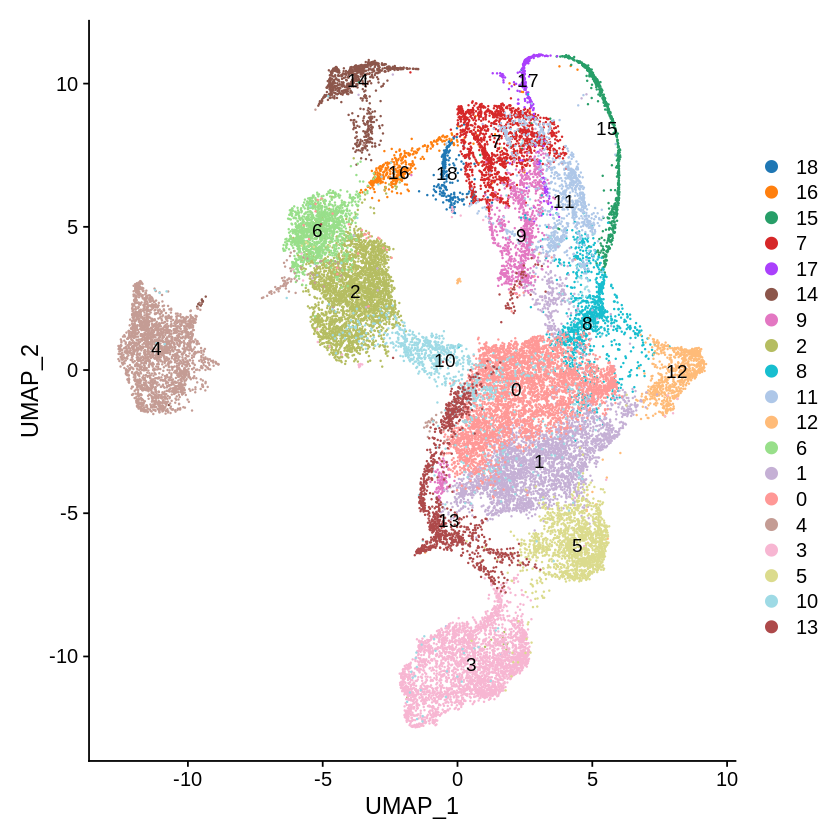

In [283]:
pos <- colnames(ch.integrated)[ch.integrated@meta.data$integrated_snn_res.5==25]
pos <- match(pos,rownames(ch.integrated@meta.data))
ch.integrated@meta.data$newtype <- ch.integrated@meta.data$integrated_snn_res.0.5
ch.integrated@meta.data$newtype[pos]<- "13"
DimPlot(ch.integrated, reduction = "umap", label = TRUE,cols = c('#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
        '#c5b0d5','#ff9896', '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5',
       '#ad494a'),group.by = 'newtype',order=c(13,10))

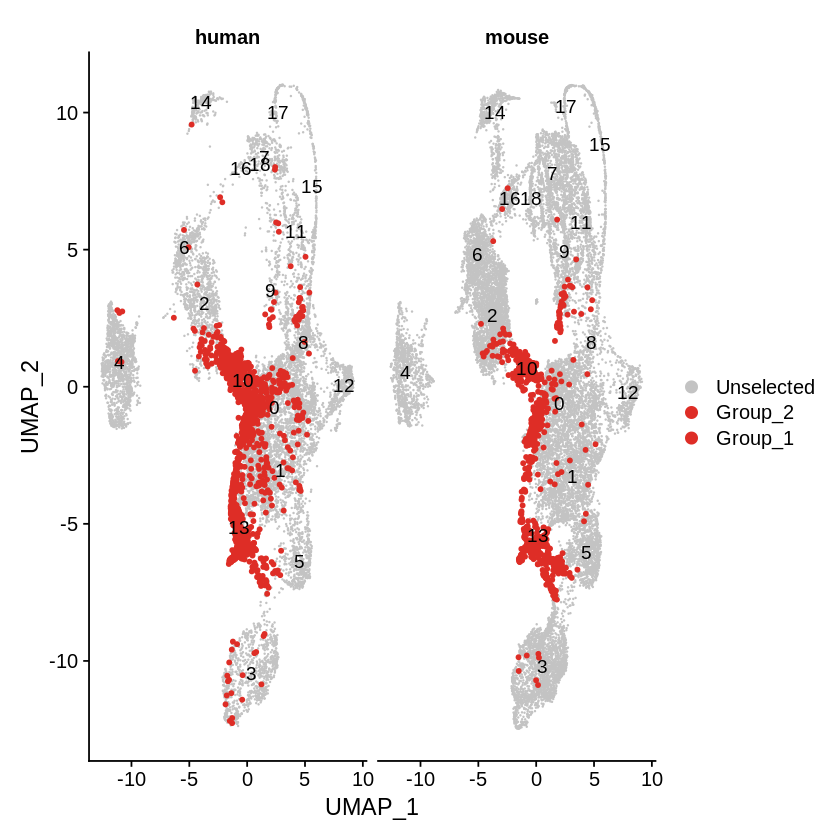

In [289]:
DimPlot(ch.integrated, reduction = "umap", label = TRUE,cells.highlight = list(colnames(ch.integrated)[ch.integrated@meta.data$newtype==10],colnames(ch.integrated)[ch.integrated@meta.data$newtype==13]),group.by="newtype",split.by='species')

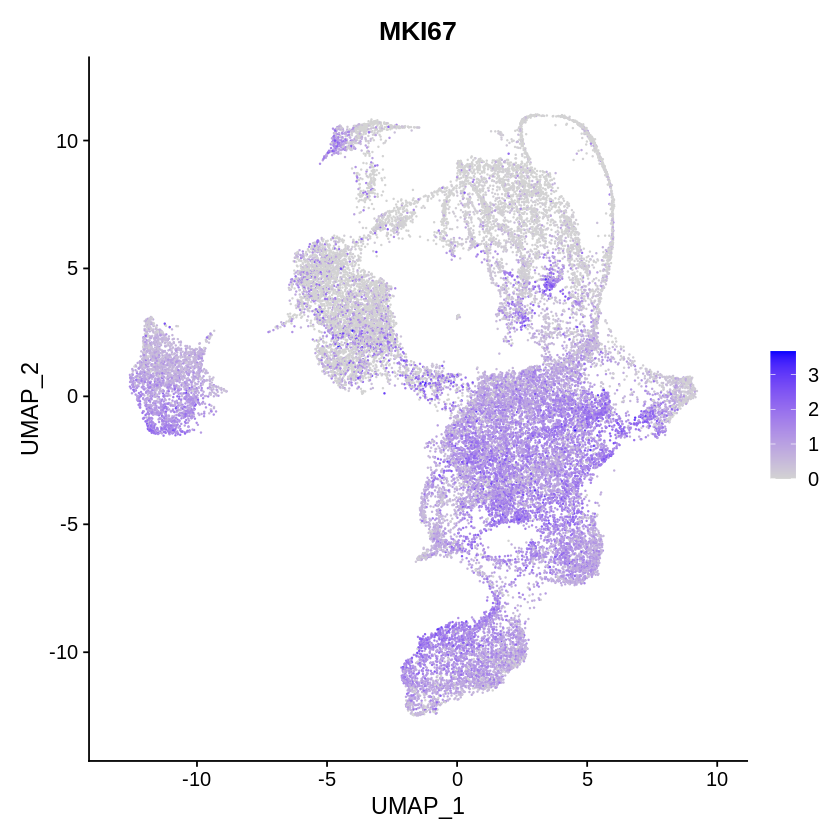

In [287]:
FeaturePlot(ch.integrated,features='MKI67',min.cutoff=0)

In [292]:
options(repr.plot.width = 20, repr.plot.height = 10)

Warning message:
“Could not find POU5F1B in the default search locations, found in RNA assay instead”


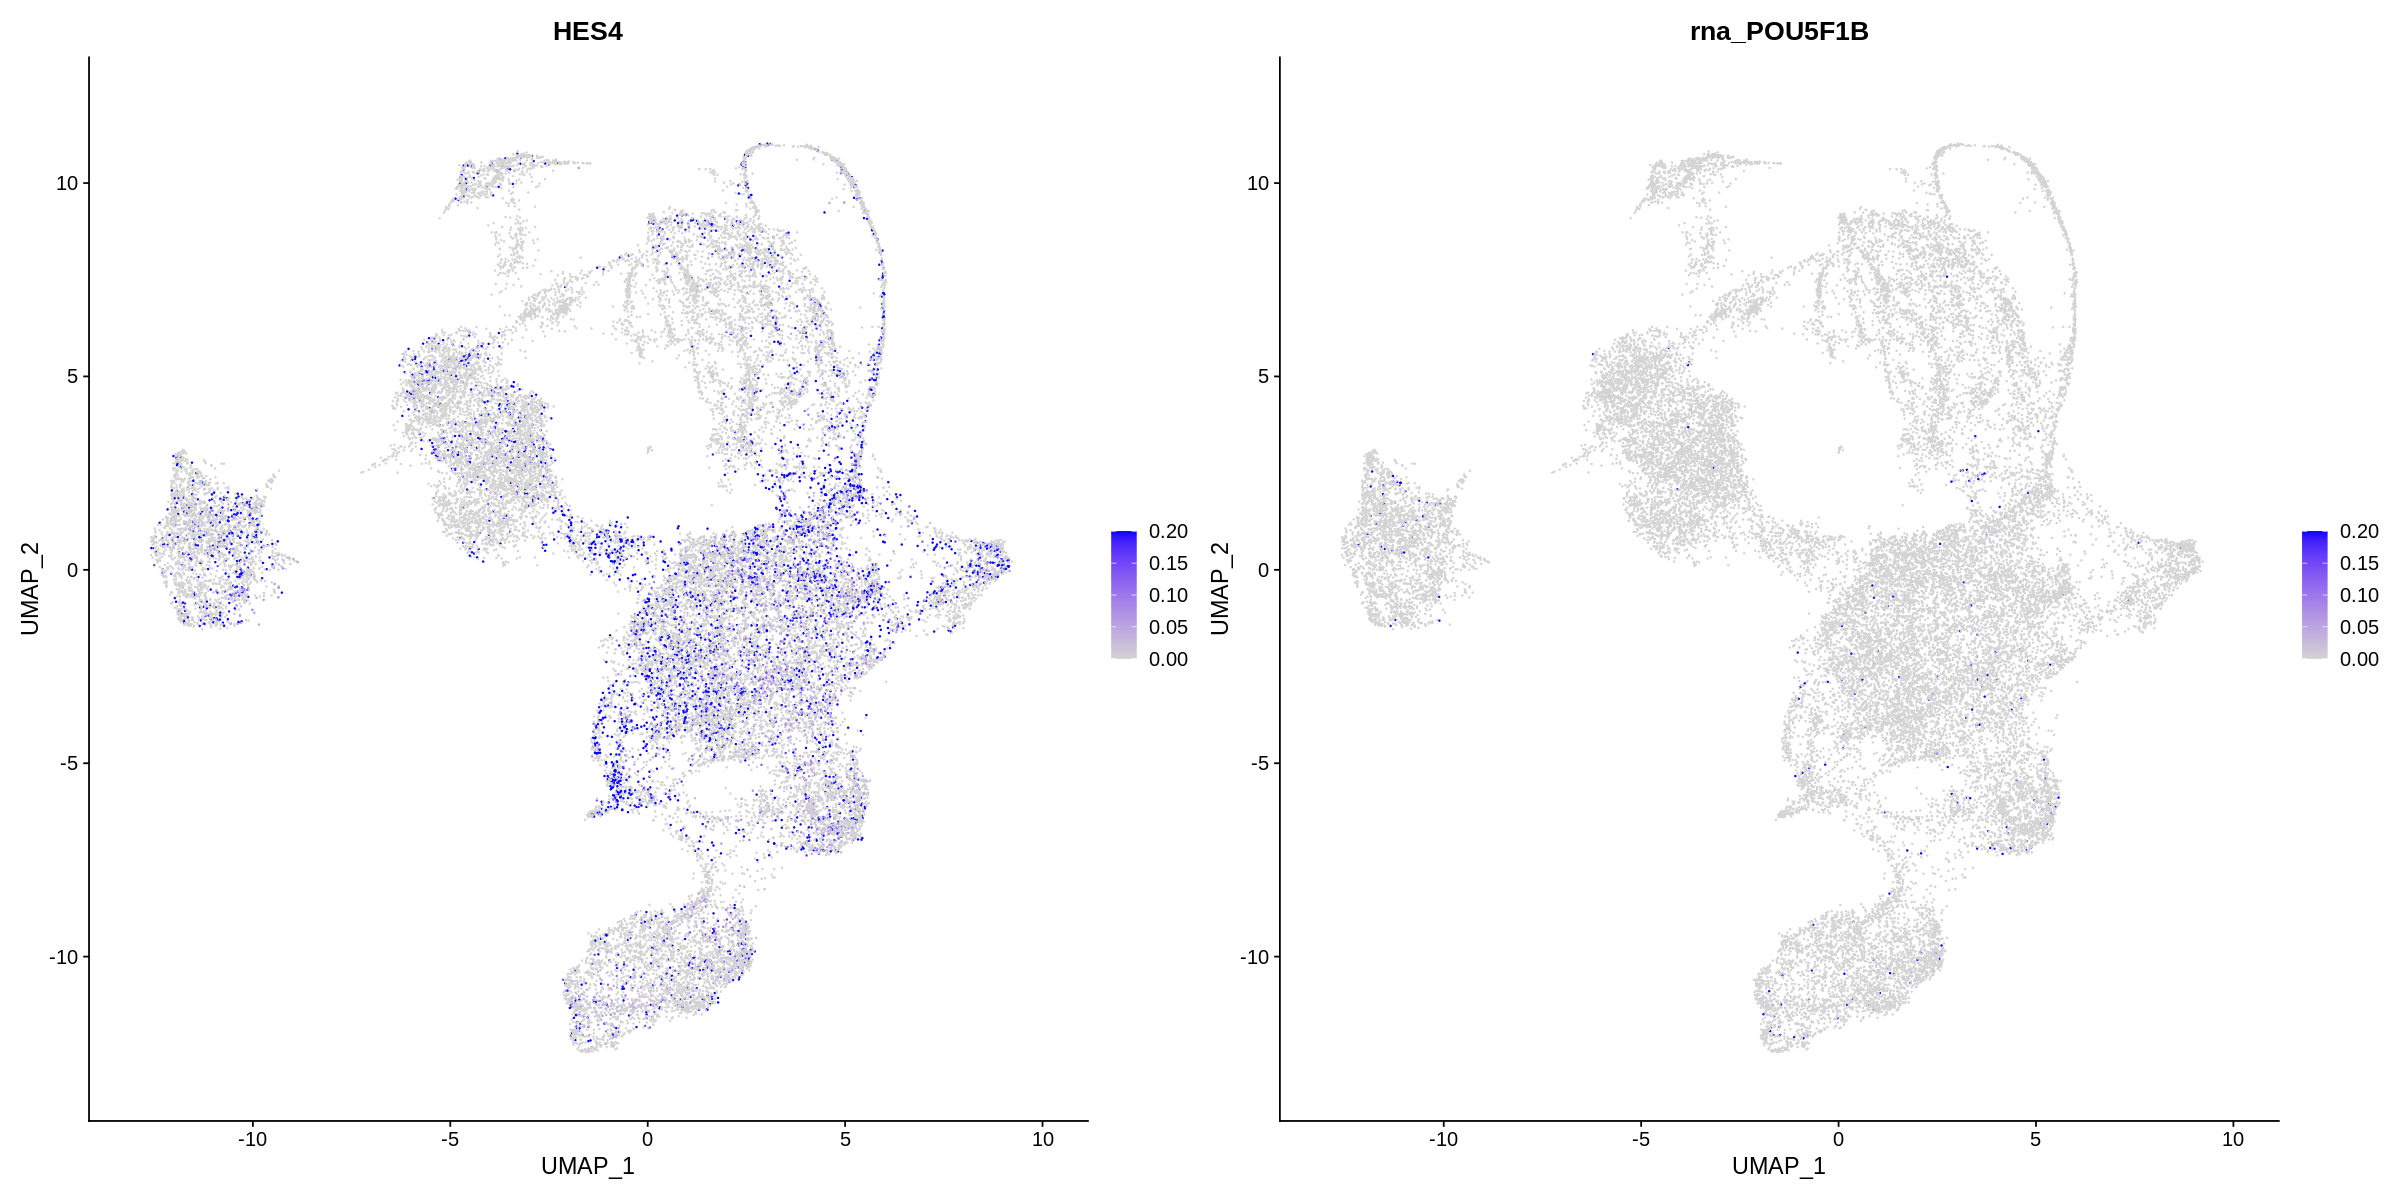

In [295]:
FeaturePlot(ch.integrated,features=c('HES4','POU5F1B'),min.cutoff = 0,max.cutoff = 0.2)

In [296]:
Idents(ch.integrated) <- "species"

In [297]:
human_test <- subset(ch.integrated,idents = 'human')

In [ ]:
DefaultAssay(human_test) <- human_test@assays$RNA

In [ ]:
FeaturePlot(human_test,features=c('HES4','POU5F1B'))

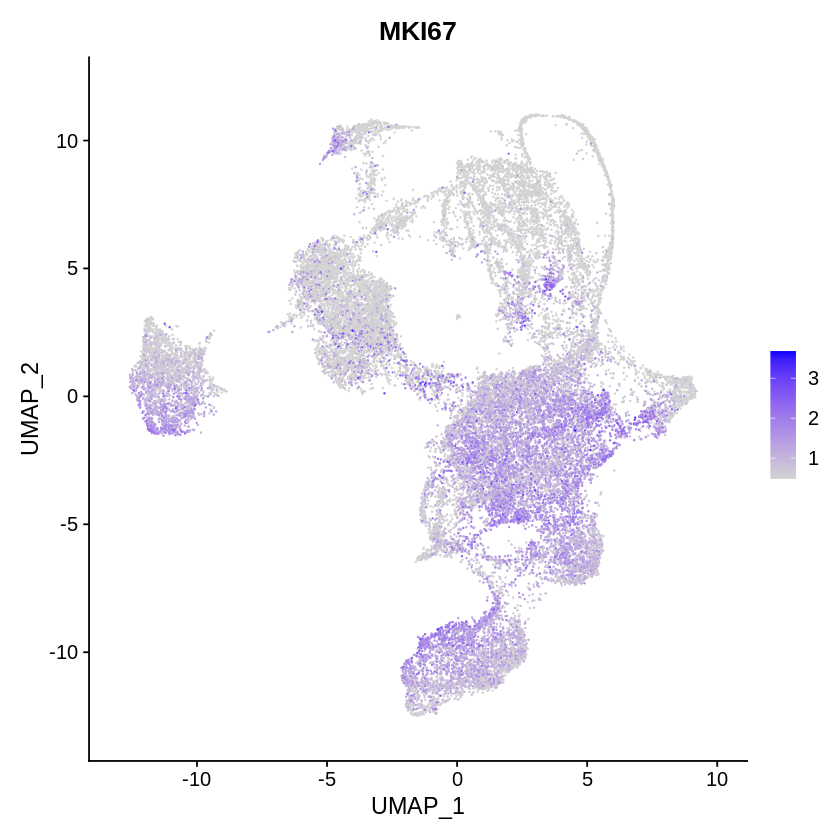

In [288]:
FeaturePlot(ch.integrated,features='MKI67',min.cutoff='q25')

In [31]:
ch.integrated@meta.data$clusters_species <- ch.integrated@meta.data$tech
pos <- match(colnames(human_neuron),colnames(ch.integrated))
ch.integrated@meta.data$clusters_species[pos] <- as.character(human_neuron@meta.data$clusters_new)
pos <- match(colnames(mouse_neuron),colnames(ch.integrated))
ch.integrated@meta.data$clusters_species[pos] <- as.character(mouse_neuron@meta.data$louvain_clusters)

In [32]:
table(ch.integrated@meta.data$clusters_species)


          12Neural_epithelium      14Spinal_cord_progenitor 
                         3124                           893 
             15M_Radial_glia2        16M_Neural_progenitor2 
                         1337                          1245 
             18M_Neural_crest               18Neural_crest2 
                         1011                           606 
              19Neural_crest3               1M_Radial_glia4 
                          216                          4582 
               23Radial_glia3              24M_Radial_glia3 
                          621                           297 
25Spinal_cord_newborn_neuron2                26Radial_glia4 
                          106                           686 
33Spinal_cord_newborn_neuron3               4M_Radial_glia1 
                           51                          3385 
 4Spinal_cord_newborn_neuron1                 5Radial_glia1 
                           90                          1952 
         6Head_newborn_

In [237]:
cols = c('12Neural_epithelium' = '#004D43',
         '5Radial_glia1' = '#006FA6',
         '7Radial_glia2' = '#FFDBE5',
         '23Radial_glia3' = '#61615A',
         '26Radial_glia4' = '#00C2A0',
         '14Spinal_cord_progenitor' = '#997D87',
         '6Head_newborn_neuron' = '#A30059',
         '4Spinal_cord_newborn_neuron1' = '#008941',
         '25Spinal_cord_newborn_neuron2' = '#6B7900',
         '33Spinal_cord_newborn_neuron3' = '#7B4F4B',
         '9Neural_crest1' = '#0000A6',
         '18Neural_crest2' = '#1B4400',
         '19Neural_crest3' = '#4FC601',
         '8M_Neural_epithelium' = '#b5bbe3',
         '4M_Radial_glia1' = '#bb7784',
         '15M_Radial_glia2' = '#ead3c6',
         '24M_Radial_glia3' = '#7f7f7f',
         '1M_Radial_glia4' = '#7d87b9',
         '18M_Neural_crest' = '#0fcfc0',
         '6M_Neural_progenitor1' = '#4a6fe3',
         '16M_Neural_progenitor2' = '#f0b98d')

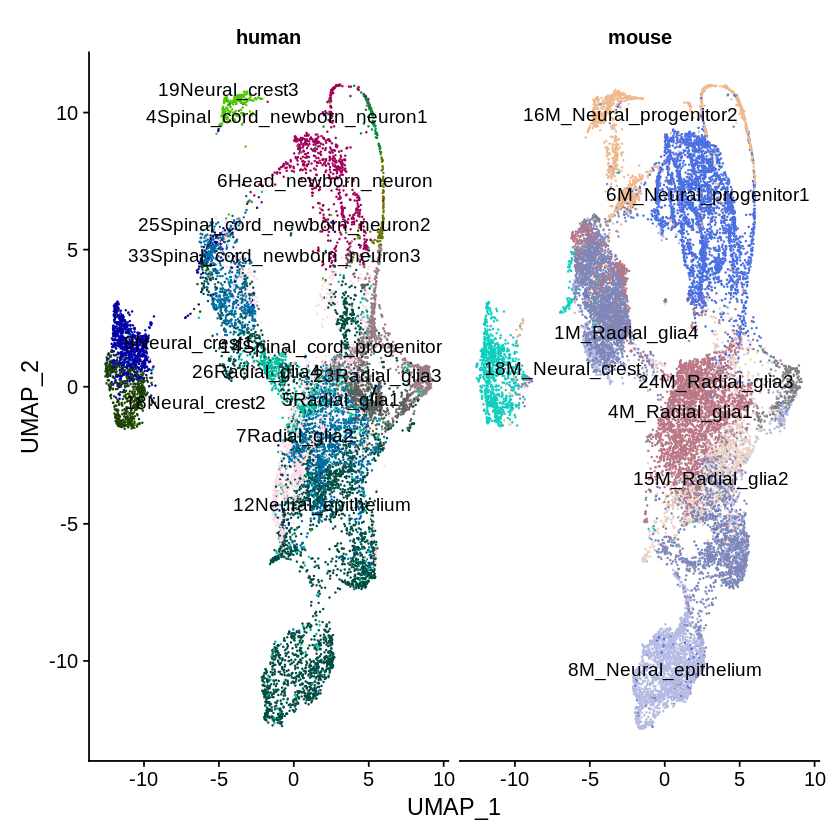

In [34]:
DimPlot(ch.integrated, reduction = "umap",label = T,group.by = 'clusters_species', repel = TRUE,split.by = 'species',cols = cols)+NoLegend()

In [254]:
tiff("human_mouse_CNS_PNS_lineage_CCA_cluster_UMAP_0729.tiff",width = 600,height = 600)
DimPlot(ch.integrated, reduction = "umap", label = TRUE,cols = c('#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
        '#c5b0d5','#ff9896', '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5',
       '#ad494a'),pt.size = 0.75,group.by = 'integrated_snn_res.0.5')
dev.off()
tiff("human_mouse_CNS_PNS_lineage_CCA_cluster_no_legend_no_axes_UMAP_0729.tiff",width = 600,height = 600)
DimPlot(ch.integrated, reduction = "umap", label = FALSE,cols = c('#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
        '#c5b0d5','#ff9896', '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5',
       '#ad494a'),pt.size = 0.75,group.by = 'integrated_snn_res.0.5')+NoLegend()+NoAxes()
dev.off()
tiff("human_mouse_CNS_PNS_lineage_CCA_cluster_UMAP_no_axes_0729.tiff",width = 600,height = 600)
DimPlot(ch.integrated, reduction = "umap", label = FALSE,cols = c('#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
        '#c5b0d5','#ff9896', '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5',
       '#ad494a'),pt.size = 0.75,group.by = 'integrated_snn_res.0.5')+NoAxes()
dev.off()

png 
  2

png 
  2

png 
  2

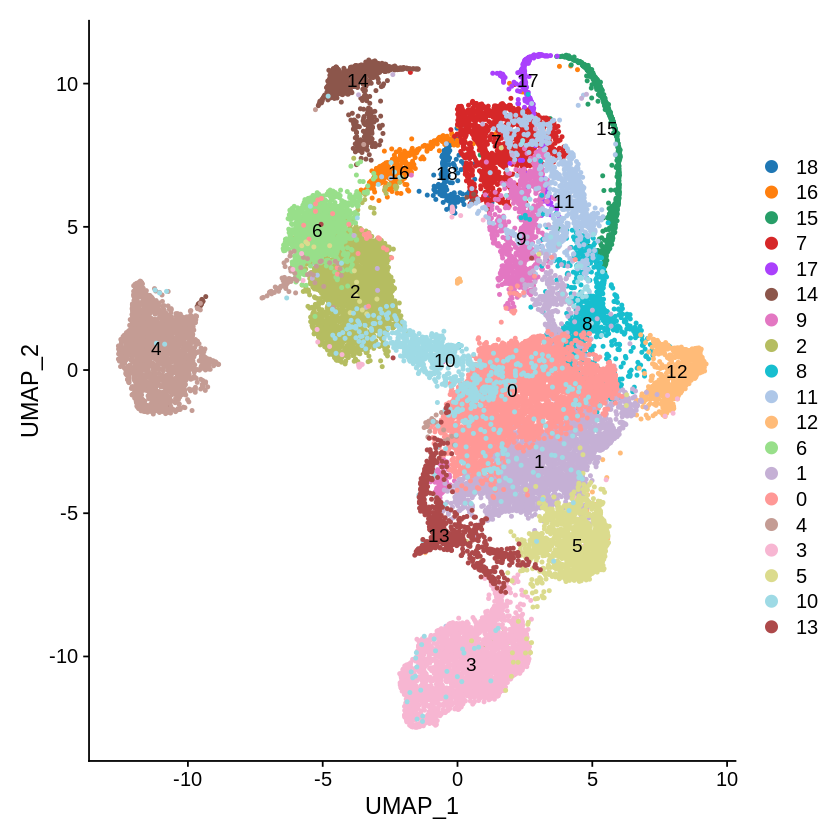

In [273]:
DimPlot(ch.integrated, reduction = "umap", label = TRUE,cols = c('#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
        '#c5b0d5','#ff9896', '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5',
       '#ad494a'),pt.size = 0.75,group.by = 'integrated_snn_res.0.5',order=c(13,10))

In [ ]:
DimPlot(ch.integrated, reduction = "umap", label = TRUE,cols = c('#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
        '#c5b0d5','#ff9896', '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5',
       '#ad494a'),pt.size = 0.75,group.by = 'integrated_snn_res.0.5',)

In [252]:
tiff("human_mouse_CNS_PNS_lineage_CCA_species_celltype_UMAP_0729.tiff",width = 1200,height = 600)
DimPlot(ch.integrated, reduction = "umap",label = T,group.by = 'clusters_species', repel = TRUE,split.by = 'species',cols = cols,pt.size = 1.25)
dev.off()
tiff("human_mouse_CNS_PNS_lineage_CCA_species_celltype_UMAP_no_legend_no_axes_0729.tiff",width = 1200,height = 600)
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'clusters_species', repel = TRUE,split.by = 'species',cols = cols,pt.size = 1.25)+NoLegend()+NoAxes()
dev.off()
tiff("human_mouse_CNS_PNS_lineage_CCA_species_celltype_UMAP_no_axes_0729.tiff",width = 1200,height = 600)
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'clusters_species', repel = TRUE,split.by = 'species',cols = cols,pt.size = 1.25)+NoAxes()
dev.off()

png 
  2

png 
  2

png 
  2

In [175]:
tiff('human_mouse_CNS_PNS_lineage_CCA_species_UMAP_C10.tiff',width = 600,height = 600)
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'integrated_snn_res.0.5', repel = TRUE,cells.highlight = ('C10'=colnames(ch.integrated)[ch.integrated$integrated_snn_res.0.5=='10']))+scale_color_manual(values = c('Unselected'='gray70','Group_1'='#ffbb78'))+NoLegend()+NoAxes()
dev.off()

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



png 
  2

In [174]:
tiff('human_mouse_CNS_PNS_lineage_CCA_species_UMAP_C13.tiff',width = 600,height = 600)
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'integrated_snn_res.0.5', repel = TRUE,cells.highlight = ('C13'=colnames(ch.integrated)[ch.integrated$integrated_snn_res.0.5=='13']))+scale_color_manual(values = c('Unselected'='gray70','Group_1'='#ff9896'))+NoLegend()+NoAxes()
dev.off()

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



png 
  2

In [234]:
colors <- c('w3'= '#FE8024',
            'w4'= '#FBBF01',
            'E85'= '#0FA326',
            'E95'= '#25B7E8',
            'E105'= '#00009A')

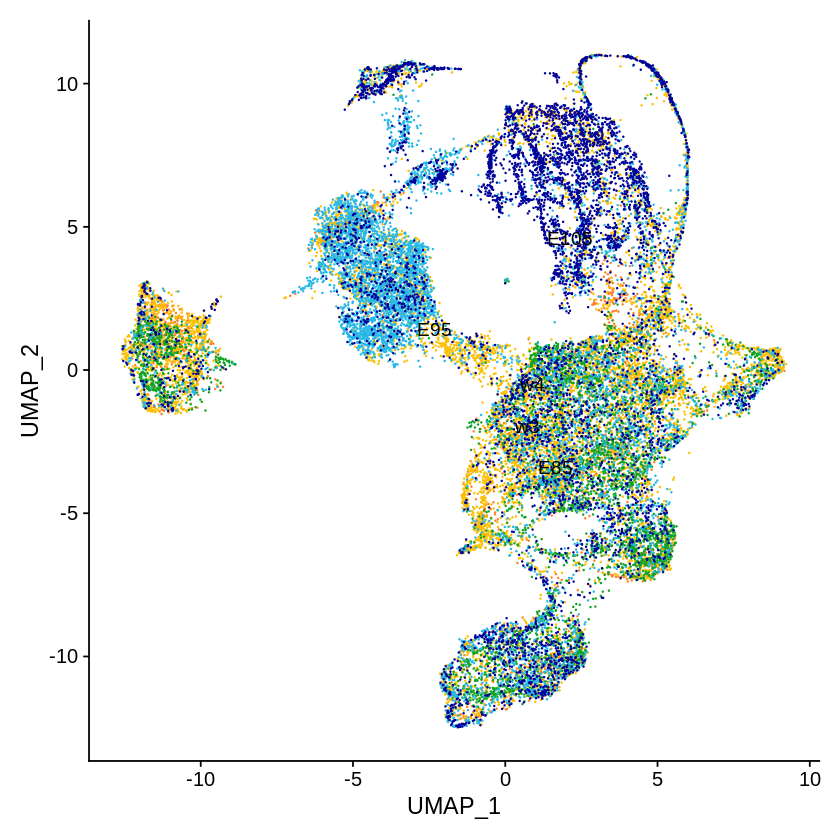

In [235]:
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'tech', repel = TRUE,cols=colors)+NoLegend()

In [253]:
tiff("human_mouse_CNS_PNS_lineage_CCA_species_age_UMAP_0729.tiff",width = 600,height = 600)
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'tech', repel = TRUE,cols=colors,pt.size = 0.75)
dev.off()
tiff("human_mouse_CNS_PNS_lineage_CCA_species_age_UMAP_no_legend_no_axes_0729.tiff",width = 600,height = 600)
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'tech', repel = TRUE,cols=colors,pt.size = 0.75)+NoLegend()+NoAxes()
dev.off()
tiff("human_mouse_CNS_PNS_lineage_CCA_species_age_UMAP_no_axes_0729.tiff",width = 600,height = 600)
DimPlot(ch.integrated, reduction = "umap",label = F,group.by = 'tech', repel = TRUE,cols=colors,pt.size = 0.75)+NoAxes()
dev.off()

png 
  2

png 
  2

png 
  2

In [231]:
table(ch.integrated$tech)


E105  E85  E95   w3   w4 
6149 4086 7448 1660 9827 

# river plot

In [155]:
Idents(ch.integrated)<-'species'
table(Idents(ch.integrated))


human mouse 
11487 17683 

In [156]:
pos_h <- grep('^human$',ch.integrated@meta.data$species)
pos_m <- grep('^mouse$',ch.integrated@meta.data$species)
length(pos_h)
length(pos_m)

[1] 11487

[1] 17683

In [157]:
cluster1 <- as.factor(ch.integrated@meta.data$clusters_new[pos_h])
cluster2 <- as.factor(ch.integrated@meta.data$louvain_clusters[pos_m])
head(colnames(ch.integrated@assays$RNA@data)[pos_h])
names(cluster1)<-colnames(ch.integrated@assays$RNA@data)[pos_h]
names(cluster2)<-colnames(ch.integrated@assays$RNA@data)[pos_m]
cluster1 <- droplevels(cluster1)
cluster2 <- droplevels(cluster2)
colnames(ch.integrated@meta.data)

[1] "AAACCTGAGCCAGAAC-1-0-0" "AAACCTGCACAGGTTT-1-0-0" "AAACCTGTCACTTACT-1-0-0"
[4] "AAACCTGTCGTTTGCC-1-0-0" "AAACGGGTCTGCTGTC-1-0-0" "AAAGATGGTCACACGC-1-0-0"

[1] "batch"                  "week.stage"             "nFeatures_RNA"         
 [4] "percent.mito"           "nCount_RNA"             "louvain"               
 [7] "clusters3"              "clusters"               "clusters.new"          
[10] "index"                  "week_stage"             "n_genes"               
[13] "percent_mito"           "n_counts"               "louvain1"              
[16] "louvain_lineage"        "Neural_clusters"        "clusters_new"          
[19] "nFeature_RNA"           "tech"                   "orig.ident"            
[22] "Day"                    "barcode"                "celltype"              
[25] "cluster"                "cluster.stage"          "cluster.sub"           
[28] "cluster.theiler"        "colour"                 "doub.density"          
[31] "doublet"                "endo_gephiX"            "endo_gephiY"           
[34] "endo_gutCluster"        "endo_gutDPT"            "endo_gutX"             
[37] "endo_gutY"              "endo_trajectoryDPT"     "endo_trajectoryName"   
[40] "haem_gephiX"            "haem_gephiY"            "haem_subclust"         
[43] "sample"                 "sequencing.batch"       "stage"                 
[46] "stripped"               "theiler"                "umapX"                 
[49] "umapY"                  "clusters1"              "clusters2"             
[52] "louvain_clusters"       "species"                "integrated_snn_res.0.5"
[55] "seurat_clusters"        "clusters_species"

In [158]:
cluster1 <- factor(cluster1,levels = c('6Head_newborn_neuron','19Neural_crest3','33Spinal_cord_newborn_neuron3','25Spinal_cord_newborn_neuron2','4Spinal_cord_newborn_neuron1','14Spinal_cord_progenitor','26Radial_glia4','23Radial_glia3','7Radial_glia2','5Radial_glia1','12Neural_epithelium','18Neural_crest2','9Neural_crest1'))
cluster2 <- factor(cluster2,levels = c('16M_Neural_progenitor2','6M_Neural_progenitor1','1M_Radial_glia4','24M_Radial_glia3','15M_Radial_glia2','4M_Radial_glia1','8M_Neural_epithelium','18M_Neural_crest'))

In [159]:
cluster_consensus <- as.factor(ch.integrated@meta.data$integrated_snn_res.0.5)
names(cluster_consensus)<- colnames(ch.integrated@assays$RNA@data)
cluster_consensus <- droplevels(cluster_consensus)
head(cluster_consensus)
head(cluster1)
head(cluster2)

AAACCTGAGCCAGAAC-1-0-0 AAACCTGCACAGGTTT-1-0-0 AAACCTGTCACTTACT-1-0-0 
                     5                      3                      3 
AAACCTGTCGTTTGCC-1-0-0 AAACGGGTCTGCTGTC-1-0-0 AAAGATGGTCACACGC-1-0-0 
                     4                      3                      3 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18

AAACCTGAGCCAGAAC-1-0-0 AAACCTGCACAGGTTT-1-0-0 AAACCTGTCACTTACT-1-0-0 
   12Neural_epithelium    12Neural_epithelium    12Neural_epithelium 
AAACCTGTCGTTTGCC-1-0-0 AAACGGGTCTGCTGTC-1-0-0 AAAGATGGTCACACGC-1-0-0 
        9Neural_crest1    12Neural_epithelium    12Neural_epithelium 
13 Levels: 6Head_newborn_neuron ... 9Neural_crest1

cell_36865.0.0   cell_36869.0.0   cell_36872.0.0   cell_36880.0.0 
18M_Neural_crest 15M_Radial_glia2  4M_Radial_glia1 15M_Radial_glia2 
  cell_36886.0.0   cell_36887.0.0 
24M_Radial_glia3 15M_Radial_glia2 
8 Levels: 16M_Neural_progenitor2 6M_Neural_progenitor1 ... 18M_Neural_crest

In [ ]:
#tab.1 <- table(cluster1, cluster_consensus[names(cluster1)])
#tab.1 <- sweep(tab.1, 1, rowSums(tab.1), "/")
#tab.2 <- table(cluster2, cluster_consensus[names(cluster2)])
#tab.2 <- sweep(tab.2, 1, rowSums(tab.2), "/")
#whichmax.1 <- apply(tab.1, 1, which.max)
#whichmax.2 <- apply(tab.2, 1, which.max)
#ord.1 <- order(whichmax.1)
#ord.2 <- order(whichmax.2)
#cluster1 <- factor(cluster1, levels = levels(cluster1)[ord.1])
#cluster2 <- factor(cluster2, levels = levels(cluster2)[ord.2])

In [160]:
  cluster1 <- cluster1[!is.na(cluster1)]
  cluster2 <- cluster2[!is.na(cluster2)]
  nodes1 <- levels(cluster1)[table(cluster1) > 0]
  nodes2 <- levels(cluster2)[table(cluster2) > 0]
  nodes_middle <- levels(cluster_consensus)[table(cluster_consensus) > 0]
  node_Xs <- c(
    rep(1, length(nodes1)), rep(2, length(nodes_middle)),
    rep(3, length(nodes2)))

min.frac=0.05
min.cells=10

 edge_list <- list()
  for (i in 1:length(nodes1)) {
    temp <- list()
    i_cells <- names(cluster1)[cluster1 == nodes1[i]]
    for (j in 1:length(nodes_middle)) {
      if (length(which(cluster_consensus[i_cells] == nodes_middle[j])) / length(i_cells) > min.frac &
          length(which(cluster_consensus[i_cells] == nodes_middle[j])) > min.cells) {
        temp[[nodes_middle[j]]] <- sum(cluster_consensus[i_cells] ==
                                         nodes_middle[j]) / length(cluster1)
      }
    }
    edge_list[[nodes1[i]]] <- temp
  }

temp

head(nodes_middle)

cluster1

nodes1

$`4`
[1] 0.08392095

$`6`
[1] 0.005745625

[1] "0" "1" "2" "3" "4" "5"

AAACCTGAGCCAGAAC-1-0-0        AAACCTGCACAGGTTT-1-0-0 
          12Neural_epithelium           12Neural_epithelium 
       AAACCTGTCACTTACT-1-0-0        AAACCTGTCGTTTGCC-1-0-0 
          12Neural_epithelium                9Neural_crest1 
       AAACGGGTCTGCTGTC-1-0-0        AAAGATGGTCACACGC-1-0-0 
          12Neural_epithelium           12Neural_epithelium 
       AAAGCAAAGGCTCTTA-1-0-0        AAAGCAAAGTGGAGAA-1-0-0 
                5Radial_glia1           12Neural_epithelium 
       AAAGCAATCTCAAACG-1-0-0        AAAGTAGCACCTATCC-1-0-0 
          12Neural_epithelium           12Neural_epithelium 
       AAATGCCTCATGCAAC-1-0-0        AAATGCCTCGGAAATA-1-0-0 
                5Radial_glia1                9Neural_crest1 
       AACCATGAGCCGCCTA-1-0-0        AACCATGGTCGGCACT-1-0-0 
          12Neural_epithelium           12Neural_epithelium 
       AACCGCGAGCTCAACT-1-0-0        AACCGCGGTTGGTTTG-1-0-0 
          12Neural_epithelium           12Neural_epithelium 
       AACTCAGAGCGTGAGT-1-0-0        AACTCAGGTTCCTCCA-1-0-0 
               9Neural_crest1                 5Radial_glia1 
       AACTCCCGTCTGATCA-1-0-0        AACTCTTAGCGATAGC-1-0-0 
               9Neural_crest1                9Neural_crest1 
       AACTTTCAGGAATGGA-1-0-0        AACTTTCGTAGCGCAA-1-0-0 
                5Radial_glia1           12Neural_epithelium 
       AACTTTCTCACAGGCC-1-0-0        AAGACCTAGAAACGCC-1-0-0 
          12Neural_epithelium           12Neural_epithelium 
       AAGACCTCATGGATGG-1-0-0        AAGGAGCAGATCGATA-1-0-0 
                5Radial_glia1                 7Radial_glia2 
       AAGGCAGCATGTCGAT-1-0-0        AAGGCAGGTGACTACT-1-0-0 
          12Neural_epithelium           12Neural_epithelium 
       AAGGTTCAGAAGGTTT-1-0-0        AAGGTTCGTCATTAGC-1-0-0 
          12Neural_epithelium                9Neural_crest1 
       AAGTCTGTCATAAAGG-1-0-0        AATCCAGAGAAACCTA-1-0-0 
               9Neural_crest1           12Neural_epithelium 
       AATCCAGAGAAGAAGC-1-0-0        AATCCAGCACATTAGC-1-0-0 
          12Neural_epithelium                9Neural_crest1 
       AATCCAGCACGAGGTA-1-0-0        AATCCAGGTCTGGAGA-1-0-0 
     14Spinal_cord_progenitor           12Neural_epithelium 
       AATCCAGTCAAACCGT-1-0-0        AATCGGTAGTGATCGG-1-0-0 
                7Radial_glia2           12Neural_epithelium 
       AATCGGTCAATAACGA-1-0-0        AATCGGTTCCCAAGTA-1-0-0 
          12Neural_epithelium           12Neural_epithelium 
       AATCGGTTCTTCAACT-1-0-0        ACACCAAGTCGAGTTT-1-0-0 
                5Radial_glia1           12Neural_epithelium 
       ACACCAAGTTACGTCA-1-0-0        ACACCAAGTTGCCTCT-1-0-0 
               9Neural_crest1           12Neural_epithelium 
       ACACCAATCACTATTC-1-0-0        ACACCCTAGGCCCTTG-1-0-0 
          12Neural_epithelium           12Neural_epithelium 
       ACACCCTCAAATCCGT-1-0-0        ACACCCTCAACTGCGC-1-0-0 
          12Neural_epithelium           12Neural_epithelium 
       ACACCCTGTCGAGTTT-1-0-0        ACACCGGAGAGATGAG-1-0-0 
          12Neural_epithelium                9Neural_crest1 
       ACAGCCGGTGAGGCTA-1-0-0        ACATACGAGATCGGGT-1-0-0 
                5Radial_glia1                9Neural_crest1 
       ACATGGTTCAGAGCTT-1-0-0        ACCAGTAAGCCAGTTT-1-0-0 
          12Neural_epithelium           12Neural_epithelium 
       ACCAGTAAGGCGACAT-1-0-0        ACCAGTACATTAGGCT-1-0-0 
                5Radial_glia1           12Neural_epithelium 
       ACCAGTATCTGAGGGA-1-0-0        ACCCACTCAAGAAGAG-1-0-0 
          12Neural_epithelium           12Neural_epithelium 
       ACCCACTTCGTTGACA-1-0-0        ACCGTAATCGTACCGG-1-0-0 
               9Neural_crest1           12Neural_epithelium 
       ACCTTTACACGTGAGA-1-0-0        ACCTTTAGTACCCAAT-1-0-0 
          12Neural_epithelium                 7Radial_glia2 
       ACGAGCCAGATGAGAG-1-0-0        ACGAGCCCATCCTAGA-1-0-0 
               9Neural_crest1                 7Radial_glia2 
       ACGAGGAGTGCCTGGT-1-0-0        ACGATACAGCTCCTTC-1-0-0 
                5Radial_glia1             

[1] "6Head_newborn_neuron"          "19Neural_crest3"              
 [3] "33Spinal_cord_newborn_neuron3" "25Spinal_cord_newborn_neuron2"
 [5] "4Spinal_cord_newborn_neuron1"  "14Spinal_cord_progenitor"     
 [7] "26Radial_glia4"                "23Radial_glia3"               
 [9] "7Radial_glia2"                 "5Radial_glia1"                
[11] "12Neural_epithelium"           "18Neural_crest2"              
[13] "9Neural_crest1"

In [161]:
edge_list <- list()
  for (i in 1:length(nodes1)) {
    temp <- list()
    i_cells <- names(cluster1)[cluster1 == nodes1[i]]
    for (j in 1:length(nodes_middle)) {
      if (length(which(cluster_consensus[i_cells] == nodes_middle[j])) / length(i_cells) > min.frac &
          length(which(cluster_consensus[i_cells] == nodes_middle[j])) > min.cells) {
        temp[[nodes_middle[j]]] <- sum(cluster_consensus[i_cells] ==
                                         nodes_middle[j]) / length(cluster1)
      }
    }
    edge_list[[nodes1[i]]] <- temp
  }
 cluster3 <- cluster_consensus[names(cluster2)]
  for (i in 1:length(nodes_middle)) {
    temp <- list()
    i_cells <- names(cluster3)[cluster3 == nodes_middle[i]]
    for (j in 1:length(nodes2)) {
      j_cells <- names(cluster2)[cluster2 == nodes2[j]]
      if (length(which(cluster_consensus[j_cells] == nodes_middle[i])) / length(j_cells) > min.frac &
          length(which(cluster_consensus[j_cells] == nodes_middle[i])) > min.cells) {
        if (!is.na(sum(cluster2[i_cells] == nodes2[j]))) {
          temp[[nodes2[j]]] <- sum(cluster2[i_cells] ==
                                     nodes2[j]) / length(cluster2)
        }
      }
    }
    edge_list[[nodes_middle[i]]] <- temp
  }

In [162]:
label.cex=1
label.col='black'
lab.srt=0

node_cols <- list()
  ggplotColors <- function(g) {
    d <- 360 / g
    h <- cumsum(c(15, rep(d, g - 1)))
    grDevices::hcl(h = h, c = 100, l = 65)
  }
  pal <- ggplotColors(length(nodes1))
  for (i in 1:length(nodes1)) {
    node_cols[[nodes1[i]]] <- list(col = pal[i], textcex = label.cex,
                                   textcol = label.col, srt = lab.srt)
  }
  pal <- ggplotColors(length(nodes_middle))
  for (i in 1:length(nodes_middle)) {
    node_cols[[nodes_middle[i]]] <- list(col = pal[i], textcex = label.cex,
                                         textcol = label.col, srt = lab.srt)
  }
  pal <- ggplotColors(length(nodes2))
  for (i in 1:length(nodes2)) {
    node_cols[[nodes2[i]]] <- list(col = pal[i], textcex = label.cex,
                                   textcol = label.col, srt = lab.srt)
  }
  # create nodes and riverplot object
  nodes <- list(nodes1, nodes_middle, nodes2)
  node.limit <- max(unlist(lapply(nodes, length)))
  
  node_Ys <- lapply(1:length(nodes), function(i) {
    seq(1, node.limit, by = node.limit / length(nodes[[i]]))
  })
  rp <- makeRiver(c(nodes1, nodes_middle, nodes2), edge_list,
                  node_xpos = node_Xs, node_ypos = unlist(node_Ys), node_styles = node_cols,
  )

In [241]:
river.yscale=3.5
river.lty =0
river.node_margin=0.5

--------------
Default style:
-----------
$nodestyle
[1] "regular"

$col
[1] "grey"

$srt
[1] "90"

$lty
[1] 1

$textcol
[1] "black"

$textcex
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotStyle"
--------------
[1] "checking edges"
Updated styles:
$`6Head_newborn_neuron`
$col
[1] "#F8766D"

$textcex
[1] 1

$textcol
[1] "black"

$srt
[1] 0

$nodestyle
[1] "regular"

$lty
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotStyle"

$`19Neural_crest3`
$col
[1] "#E18A00"

$textcex
[1] 1

$textcol
[1] "black"

$srt
[1] 0

$nodestyle
[1] "regular"

$lty
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotStyle"

$`33Spinal_cord_newborn_neuron3`
$col
[1] "#BE9C00"

$textcex
[1] 1

$textcol
[1] "black"

$srt
[1] 0

$nodestyle
[1] "regular"

$lty
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotSty

NULL

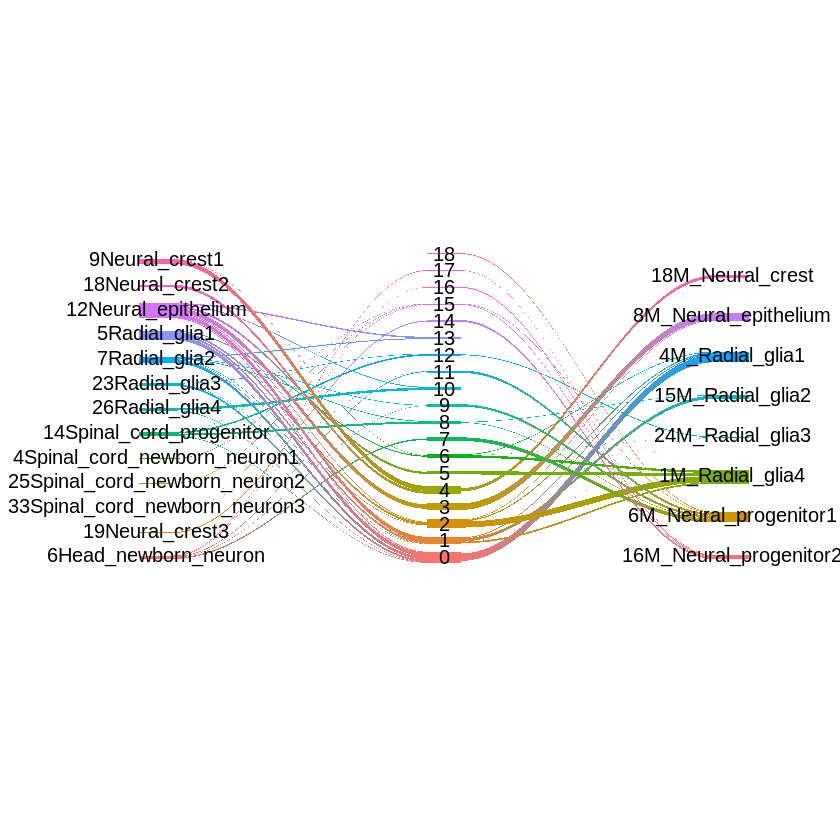

In [238]:
riverplot(rp,lty=river.lty,yscale=river.yscale,node_margin=river.node_margin)

In [242]:
rp$styles$'12Neural_epithelium'$col = '#004D43'
rp$styles$'5Radial_glia1'$col = '#006FA6'
rp$styles$'7Radial_glia2'$col = '#FFDBE5'
rp$styles$'23Radial_glia3'$col = '#61615A'
rp$styles$'26Radial_glia4'$col = '#00C2A0'
rp$styles$'14Spinal_cord_progenitor'$col = '#997D87'
rp$styles$'6Head_newborn_neuron'$col = '#A30059'
rp$styles$'4Spinal_cord_newborn_neuron1'$col = '#008941'
rp$styles$'25Spinal_cord_newborn_neuron2'$col = '#6B7900'
rp$styles$'33Spinal_cord_newborn_neuron3'$col = '#7B4F4B'
rp$styles$'9Neural_crest1'$col = '#0000A6'
rp$styles$'18Neural_crest2'$col = '#1B4400'
rp$styles$'19Neural_crest3'$col = '#4FC601'
rp$styles$'8M_Neural_epithelium'$col = '#b5bbe3'
rp$styles$'4M_Radial_glia1'$col = '#bb7784'
rp$styles$'15M_Radial_glia2'$col = '#ead3c6'
rp$styles$'24M_Radial_glia3'$col = '#7f7f7f'
rp$styles$'1M_Radial_glia4'$col = '#7d87b9'
rp$styles$'18M_Neural_crest'$col = '#0fcfc0'
rp$styles$'6M_Neural_progenitor1'$col = '#4a6fe3'
rp$styles$'16M_Neural_progenitor2'$col = '#f0b98d'
rp$styles$'0'$col = '#1f77b4'
rp$styles$'1'$col = '#ff7f0e'
rp$styles$'2'$col = '#279e68'
rp$styles$'3'$col = '#d62728'
rp$styles$'4'$col = '#aa40fc'
rp$styles$'5'$col = '#8c564b'
rp$styles$'6'$col = '#e377c2'
rp$styles$'7'$col = '#b5bd61'
rp$styles$'8'$col = '#17becf'
rp$styles$'9'$col = '#aec7e8'
rp$styles$'10'$col = '#ffbb78'
rp$styles$'11'$col = '#98df8a'
rp$styles$'12'$col = '#c5b0d5'
rp$styles$'13'$col = '#ff9896'
rp$styles$'14'$col = '#c49c94'
rp$styles$'15'$col = '#f7b6d2'
rp$styles$'16'$col = '#dbdb8d'
rp$styles$'17'$col = '#9edae5'
rp$styles$'18'$col = '#ad494a'

In [244]:
pdf("human_mouse_CNS_PNS_lineage_CCA_riverplot_0729.pdf",width = 8,height = 10)
riverplot(rp,lty=river.lty,yscale=river.yscale,node_margin=river.node_margin)
dev.off()

--------------
Default style:
-----------
$nodestyle
[1] "regular"

$col
[1] "grey"

$srt
[1] "90"

$lty
[1] 1

$textcol
[1] "black"

$textcex
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotStyle"
--------------
[1] "checking edges"
Updated styles:
$`6Head_newborn_neuron`
$col
[1] "#A30059"

$textcex
[1] 1

$textcol
[1] "black"

$srt
[1] 0

$nodestyle
[1] "regular"

$lty
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotStyle"

$`19Neural_crest3`
$col
[1] "#4FC601"

$textcex
[1] 1

$textcol
[1] "black"

$srt
[1] 0

$nodestyle
[1] "regular"

$lty
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotStyle"

$`33Spinal_cord_newborn_neuron3`
$col
[1] "#7B4F4B"

$textcex
[1] 1

$textcol
[1] "black"

$srt
[1] 0

$nodestyle
[1] "regular"

$lty
[1] 1

$edgecol
[1] "gradient"

$edgestyle
[1] "sin"

attr(,"class")
[1] "list"           "riverplotSty

png 
  2

In [154]:
tiff("C18_NKX2-1_0728.pdf",width = 700,height = 600)
FeaturePlot(ch.integrated,features = "NKX2-1",min.cutoff = 'q5',cols = c("#8A009F","#FFFD0A"))+NoAxes()
dev.off()

png 
  2

In [52]:
Idents(ch.integrated) <- "integrated_snn_res.0.5"
cluster10_13 <- subset(ch.integrated,idents = c(10,13))

In [53]:
cluster10_13 <- cluster10_13@meta.data
write.table(cluster10_13,file = "cluster10_13.csv",sep = ',')

In [55]:
dim(cluster10_13)

[1] 1778   56

In [54]:
saveRDS(ch.integrated,file = '/datb/share_tmp/bo_data/human_mouse_neuron_ch_integrated.rds')

In [58]:
cluster10.markers <- FindMarkers(ch.integrated, ident.1 = 10, logfc.threshold = 0.25, test.use = "wilcox", min.pct = 0.1)
cluster13.markers <- FindMarkers(ch.integrated, ident.1 = 13, logfc.threshold = 0.25, test.use = "wilcox", min.pct = 0.1)

In [59]:
write.table(cluster10.markers, file = "human_mouse_neuron_system_cluster10_markers_0728.csv",sep = ",")
write.table(cluster13.markers, file = "human_mouse_neuron_system_cluster13_markers_0728.csv",sep = ",")

In [60]:
genes_10 <- c('SLC2A1','HES5','HMGCR','SFRP1','PTPRZ1','PAX6','SFRP2','SLC16A3','TOP2A','MEIS2','BOC')

In [61]:
genes_13 <- c('WLS','MSX1','ZIC5','WNT1','SAMD5','CDH11','ID1','ZIC1','ID3','SPARC','FGFR2','SERPINH1','ID2','COL2A1')

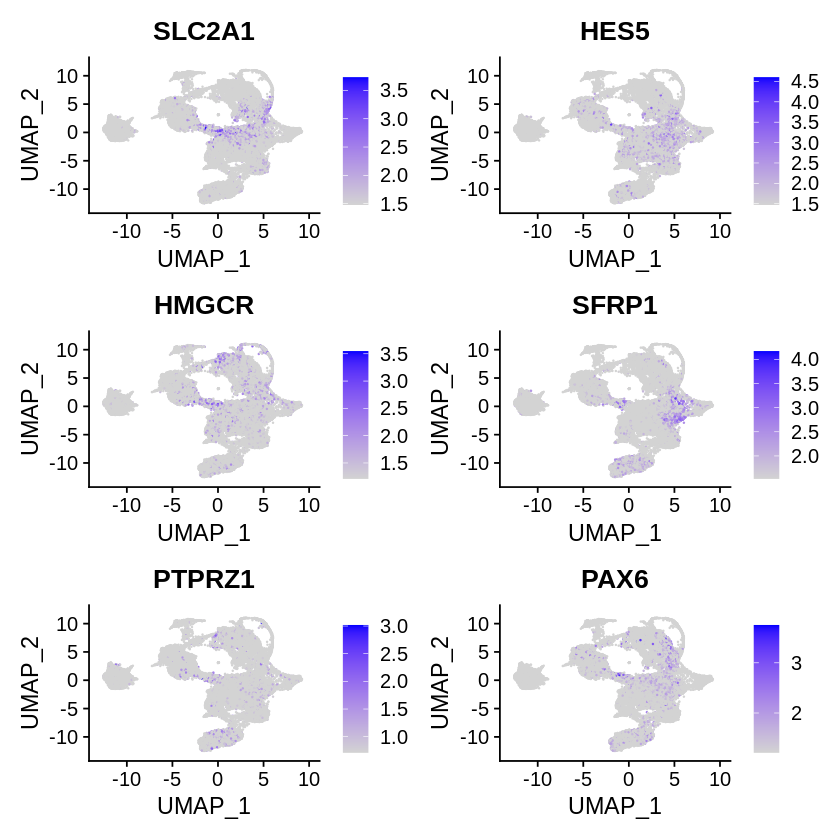

In [75]:
FeaturePlot(ch.integrated,features = genes_10[1:6],min.cutoff = 'q80')

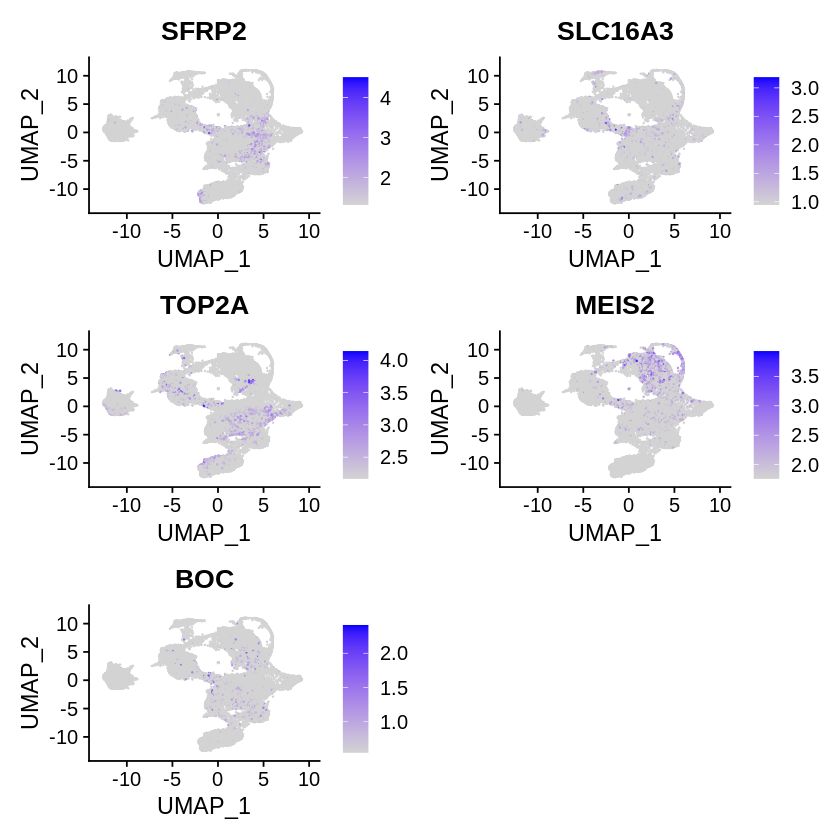

In [76]:
FeaturePlot(ch.integrated,features = genes_10[7:11],min.cutoff = 'q80')

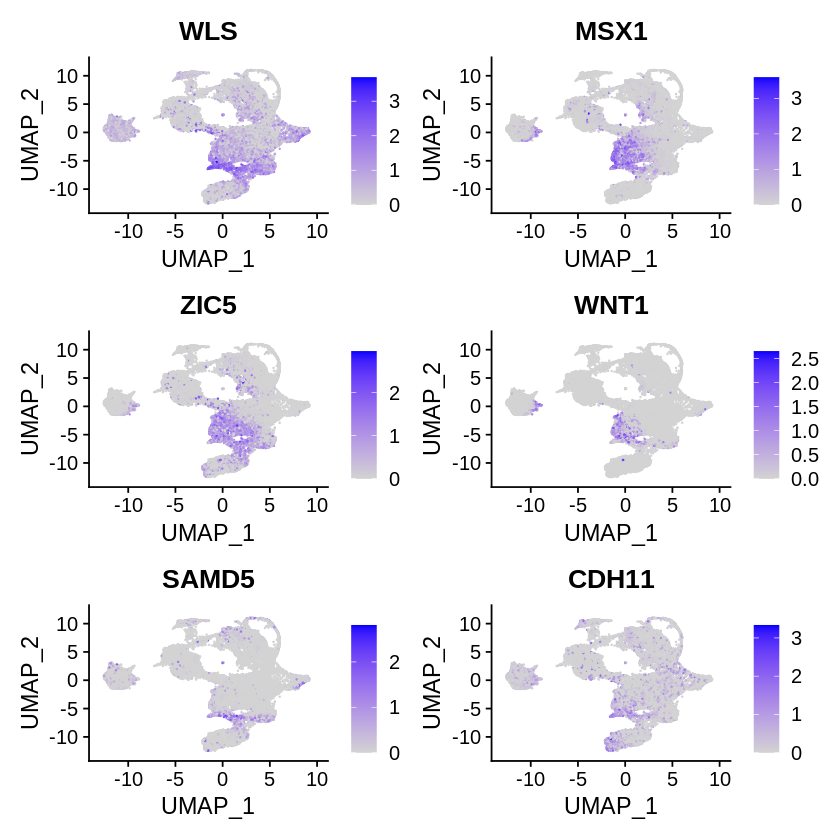

In [77]:
FeaturePlot(ch.integrated,features = genes_13[1:6],min.cutoff = 0)

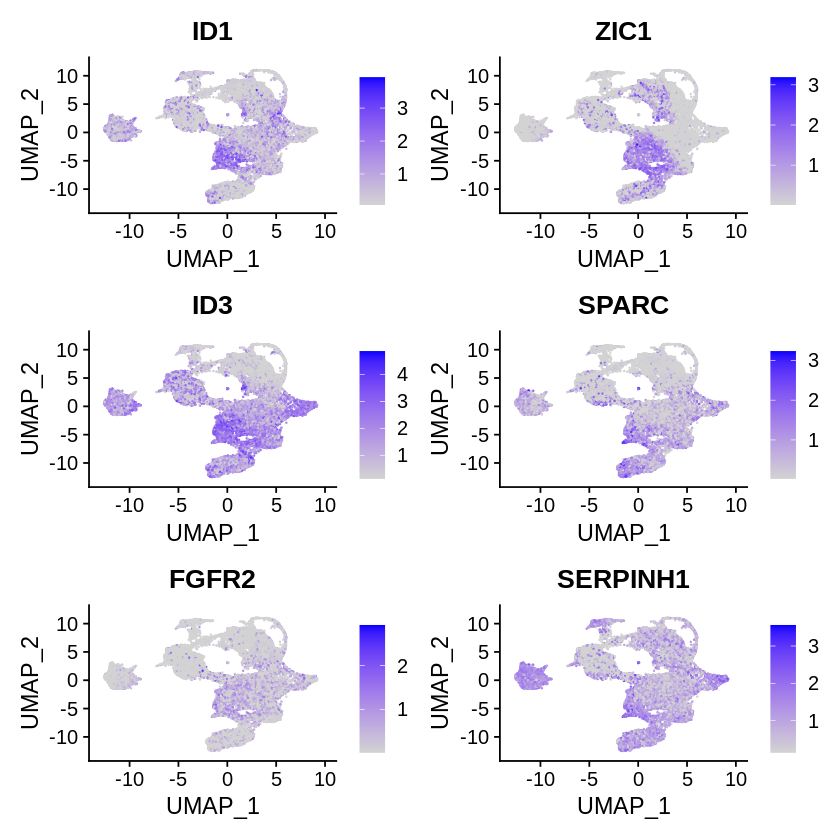

In [82]:
FeaturePlot(ch.integrated,features = genes_13[7:12],min.cutoff = 'q5')

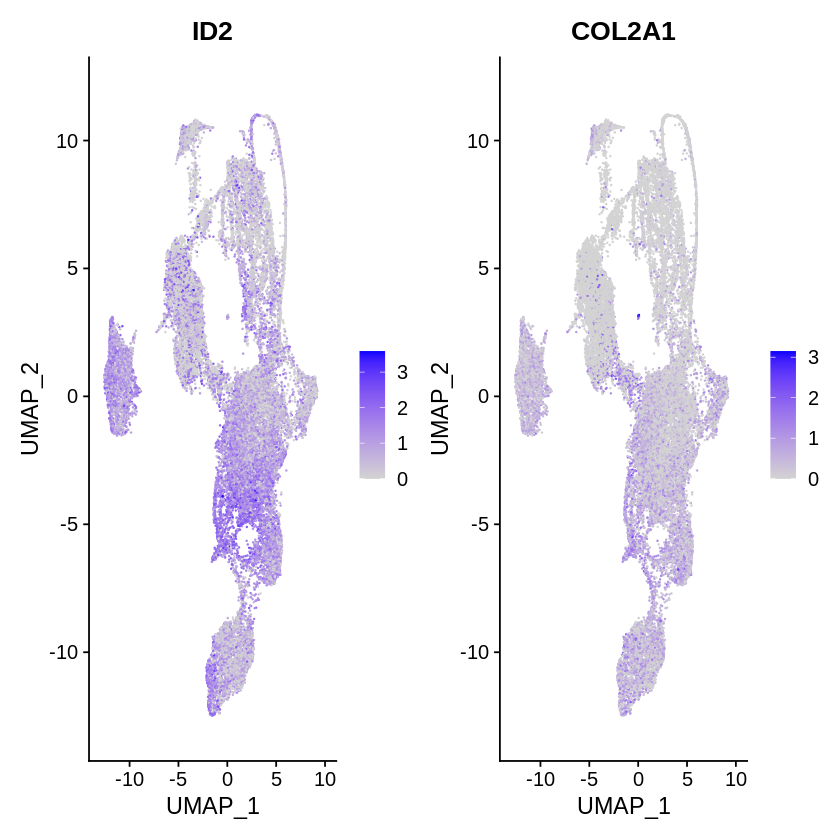

In [81]:
FeaturePlot(ch.integrated,features = genes_13[13:14],min.cutoff = 0)

In [108]:
tiff("C13_MSX1_0728.tiff",width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'MSX1',min.cutoff = 'q25',cols = c("#8A009F","#FFFD0A"))+NoAxes()
dev.off()

png 
  2

In [109]:
tiff("C13_ZIC5_0728.tiff",width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'ZIC5',min.cutoff = 'q25',cols = c("#8A009F","#FFFD0A"))+NoAxes()
dev.off()

png 
  2

In [111]:
tiff("C13_WNT1_0728.tiff",width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'WNT1',min.cutoff = 'q25',cols = c("#8A009F","#FFFD0A"))+NoAxes()
dev.off()

png 
  2

In [113]:
tiff("C13_SAMD5_0728.tiff",width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'SAMD5',min.cutoff = 'q25',cols = c("#8A009F","#FFFD0A"))+NoAxes()
dev.off()

png 
  2

In [120]:
tiff("C10_SLC2A1_0728.tiff",width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'SLC2A1',min.cutoff = 'q25',cols = c("#8A009F","#FFFD0A"))+NoAxes()
dev.off()

png 
  2

In [121]:
tiff("C10_HMGCR_0728.tiff",width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'HMGCR',min.cutoff = 'q25',cols = c("#8A009F","#FFFD0A"))+NoAxes()
dev.off()

png 
  2

In [123]:
tiff("C10_SLC16A3_0728.tiff",width = 700,height = 600)
FeaturePlot(ch.integrated,features = 'SLC16A3',min.cutoff = 'q25',cols = c("#8A009F","#FFFD0A"))+NoAxes()
dev.off()

png 
  2

In [255]:
table(ch.integrated@meta.data$integrated_snn_res.0.5)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
4572 3328 3198 3102 2608 1605 1376 1374 1080  987  950  938  833  828  780  644 
  16   17   18 
 422  294  251 

In [256]:
Idents(ch.integrated) <- 'integrated_snn_res.0.5'

In [257]:
C10 <- subset(ch.integrated,idents = 10)
C13 <- subset(ch.integrated,idents = 13)

In [258]:
table(C10@meta.data$species)


human mouse 
  744   206 

In [259]:
table(C13@meta.data$species)


human mouse 
  529   299 

In [260]:
table(ch.integrated@meta.data$species)


human mouse 
11487 17683 

In [261]:
744/11487

[1] 0.06476887

In [264]:
206/17683

[1] 0.01164961

In [265]:
0.0647688691564377/(0.0647688691564377+0.0116496069671436)

[1] 0.8475551

In [266]:
529/11487

[1] 0.04605206

In [267]:
299/17683

[1] 0.0169089

In [268]:
0.0460520588491338/(0.0460520588491338+0.0169088955493977)

[1] 0.7314384

# Human and mouse cross species genes

In [124]:
Idents(ch.integrated) <- 'species'
human_mouse_DEG.markers <- FindAllMarkers(ch.integrated)
write.table(human_mouse_DEG.markers, file = "human_mouse_DEG_0728.csv",sep = ",")

Calculating cluster human

Calculating cluster mouse



In [125]:
human_mouse_DEG.markers

p_val         avg_logFC  pct.1 pct.2 p_val_adj     cluster
LHX2             0.000000e+00 -0.2573628 0.909 0.512  0.000000e+00 human  
NEFL             0.000000e+00 -0.3573805 0.956 0.378  0.000000e+00 human  
NHLH2           2.866490e-178 -0.3337974 0.792 0.449 5.732980e-175 human  
IGFBPL1         2.400960e-168 -0.3280195 0.904 0.531 4.801920e-165 human  
EBF1            6.331570e-120 -0.3355049 0.781 0.460 1.266314e-116 human  
HBB-Y           8.143001e-118 -0.3639059 1.000 1.000 1.628600e-114 human  
STMN2           3.841307e-114 -0.5160567 0.850 0.435 7.682614e-111 human  
D930028M14RIK   1.361438e-108 -0.5384454 0.760 0.453 2.722876e-105 human  
MAP2            2.061290e-107 -0.2740445 0.572 0.539 4.122581e-104 human  
HBA-X           9.453758e-106 -0.4038384 1.000 0.996 1.890752e-102 human  
INA             6.474294e-100 -0.3625657 0.751 0.408  1.294859e-96 human  
RTN1             1.464087e-90 -0.2692760 0.950 0.597  2.928173e-87 human  
HBB-BH1          5.226742e-69 -0.3853699 1.000 0.913  1.045348e-65 human  
HBA-A1           8.415642e-54 -0.4159977 1.000 0.988  1.683128e-50 human  
TUBB3            2.180594e-30 -0.5795931 1.000 0.632  4.361187e-27 human  
TUBA1A           1.632345e-20 -0.2544157 0.995 0.979  3.264690e-17 human  
NEFM             3.282247e-07 -0.3314823 0.646 0.478  6.564493e-04 human  
ELAVL2           8.247900e-05 -0.2566924 0.964 0.677  1.649580e-01 human  
CRABP1           6.124397e-04 -0.5372887 0.953 0.845  1.000000e+00 human  
ONECUT2          3.557804e-03 -0.4228289 0.728 0.547  1.000000e+00 human  
NEFL.1           0.000000e+00  0.3573805 0.378 0.956  0.000000e+00 mouse  
LHX2.1           0.000000e+00  0.2573628 0.512 0.909  0.000000e+00 mouse  
NHLH2.1         2.866490e-178  0.3337974 0.449 0.792 5.732980e-175 mouse  
IGFBPL1.1       2.400960e-168  0.3280195 0.531 0.904 4.801920e-165 mouse  
EBF1.1          6.331570e-120  0.3355049 0.460 0.781 1.266314e-116 mouse  
HBB-Y.1         8.143001e-118  0.3639059 1.000 1.000 1.628600e-114 mouse  
STMN2.1         3.841307e-114  0.5160567 0.435 0.850 7.682614e-111 mouse  
D930028M14RIK.1 1.361438e-108  0.5384454 0.453 0.760 2.722876e-105 mouse  
MAP2.1          2.061290e-107  0.2740445 0.539 0.572 4.122581e-104 mouse  
HBA-X.1         9.453758e-106  0.4038384 0.996 1.000 1.890752e-102 mouse  
INA.1           6.474294e-100  0.3625657 0.408 0.751  1.294859e-96 mouse  
RTN1.1           1.464087e-90  0.2692760 0.597 0.950  2.928173e-87 mouse  
HBB-BH1.1        5.226742e-69  0.3853699 0.913 1.000  1.045348e-65 mouse  
HBA-A1.1         8.415642e-54  0.4159977 0.988 1.000  1.683128e-50 mouse  
TUBB3.1          2.180594e-30  0.5795931 0.632 1.000  4.361187e-27 mouse  
TUBA1A.1         1.632345e-20  0.2544157 0.979 0.995  3.264690e-17 mouse  
NEFM.1           3.282247e-07  0.3314823 0.478 0.646  6.564493e-04 mouse  
ELAVL2.1         8.247900e-05  0.2566924 0.677 0.964  1.649580e-01 mouse  
CRABP1.1         6.124397e-04  0.5372887 0.845 0.953  1.000000e+00 mouse  
ONECUT2.1        3.557804e-03  0.4228289 0.547 0.728  1.000000e+00 mouse  
                gene         
LHX2            LHX2         
NEFL            NEFL         
NHLH2           NHLH2        
IGFBPL1         IGFBPL1      
EBF1            EBF1         
HBB-Y           HBB-Y        
STMN2           STMN2        
D930028M14RIK   D930028M14RIK
MAP2            MAP2         
HBA-X           HBA-X        
INA             INA          
RTN1            RTN1         
HBB-BH1         HBB-BH1      
HBA-A1          HBA-A1       
TUBB3           TUBB3        
TUBA1A          TUBA1A       
NEFM            NEFM         
ELAVL2          ELAVL2       
CRABP1          CRABP1       
ONECUT2         ONECUT2      
NEFL.1          NEFL         
LHX2.1          LHX2         
NHLH2.1         NHLH2        
IGFBPL1.1       IGFBPL1      
EBF1.1          EBF1         
HBB-Y.1         HBB-Y        
STMN2.1         STMN2        
D930028M14RIK.1 D930028M14RIK
MAP2.1          MAP2         
HBA-X.1         HBA-X        
INA.1      

In [127]:
Idents(ch.integrated) <- "species"
avg.hh <- log1p(AverageExpression(ch.integrated,verbose = FALSE)$RNA)
avg.hh$gene <- rownames(avg.hh)

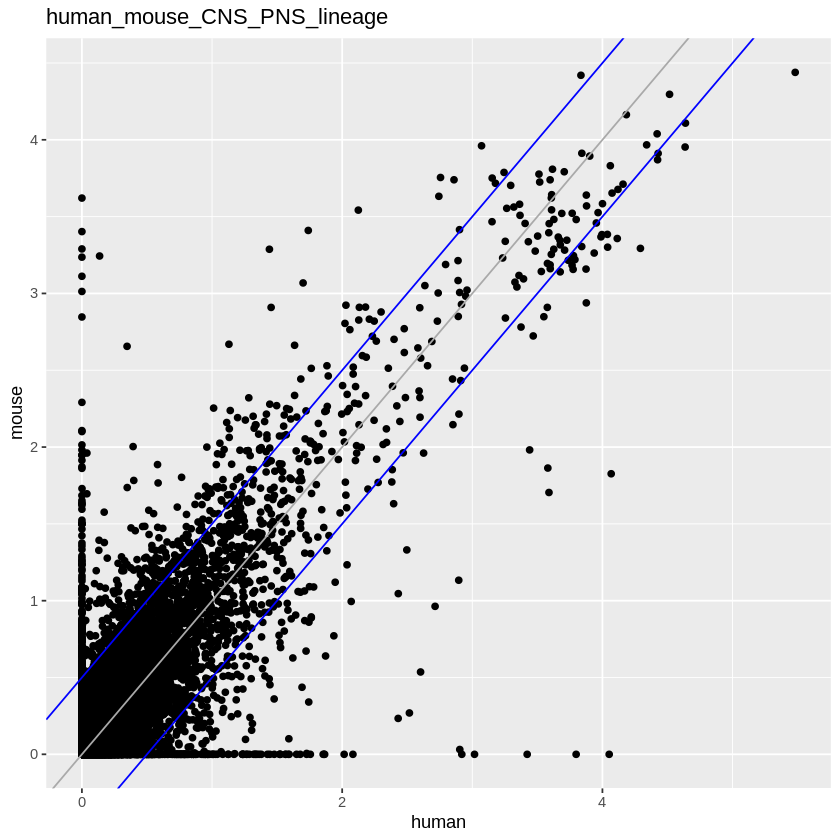

In [128]:
p1 <- ggplot(avg.hh, aes(human, mouse)) + geom_point() + ggtitle("human_mouse_CNS_PNS_lineage")
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = -0.5),color = "blue")
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = 0),color = "darkgray")
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = 0.5),color = "blue")                       
plot(p1)

In [176]:
label_genes <- c('HES4','CAMK2N1','POU3F1','LPHN2','ID2','LAPTM4A','ZFP36L2','FAM161A','RPL31','CXCR4','FRZB','RBP1','HES1',
                 'UCHL1','MIR302B','SFRP2','CPE','FST','ADAMTS6','ZNF608','PTTG1','SOX4','HLA-C','HSPA1A','HSPA1B','FILIP1',
                 'TPBG','CITED2','CD99','GPC3','CLU','TLE4','IER5L','VIM','PCBD1','PSAP','ZNF503','IGF2','ADM','NEAT1','MALAT1',
                 'PRSS23','MGST1','FAM60A','COL2A1','PMEL','BTG1','ZNF219','DLK1','CKB','TPM1','CRABP1','CLDN6','COTL1','FAM64A',
                 'HOXB-AS3','RAX','RPSAP58','APOE','RPL13A','TNNT1','CXADR')

In [177]:
DEG <- human_mouse_DEG.markers$gene

In [178]:
label_genes <- c(label_genes,DEG)

In [179]:
label_genes <- unique(label_genes)

When using repel, set xnudge and ynudge to 0 for optimal results



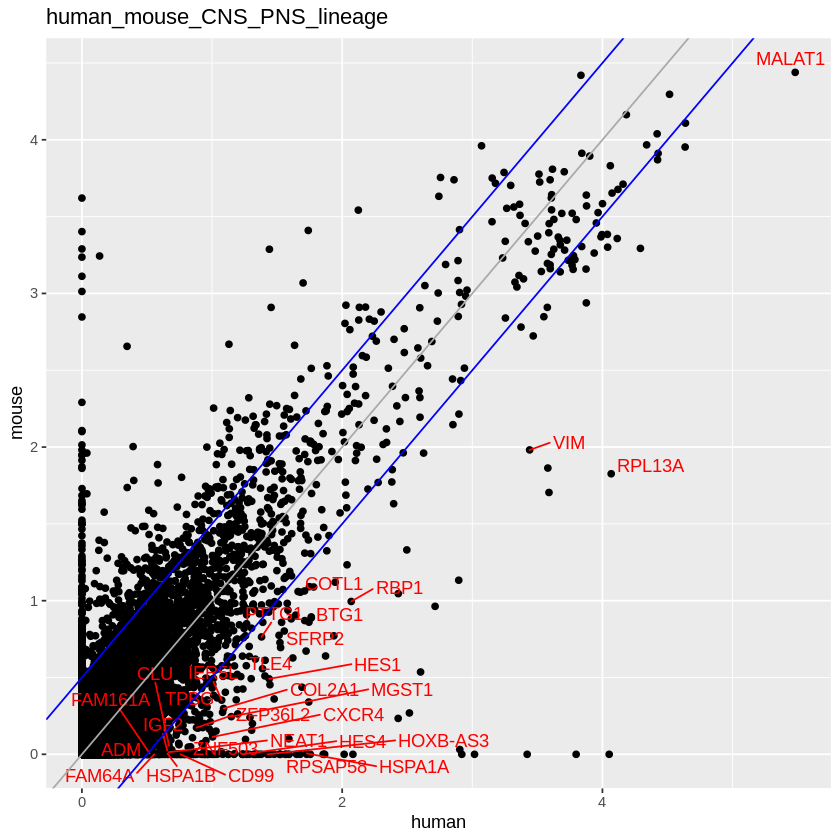

In [183]:
k1 <- avg.hh[avg.hh$human-0.5 > avg.hh$mouse, 'gene']
label_genes1 <- intersect(k1,label_genes)
genes.to.label = label_genes1
p1 <- ggplot(avg.hh, aes(human, mouse)) + geom_point() + ggtitle("human_mouse_CNS_PNS_lineage")
p1 <- LabelPoints(plot = p1, points = genes.to.label,repel = TRUE, color='red')
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = -0.5),color = "blue")
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = 0),color = "darkgray")
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = 0.5),color = "blue")                       
plot(p1)

In [201]:
avg.hh

human        mouse        gene          
RP11-34P13.7   1.194982e-03 0.0000000000 RP11-34P13.7  
RP11-34P13.8   0.000000e+00 0.0000000000 RP11-34P13.8  
AL627309.1     4.006137e-03 0.0000000000 AL627309.1    
AP006222.2     1.164749e-01 0.0000000000 AP006222.2    
RP4-669L17.10  1.156695e-03 0.0000000000 RP4-669L17.10 
RP5-857K21.4   6.800016e-04 0.0000000000 RP5-857K21.4  
RP11-206L10.3  1.431238e-02 0.0000000000 RP11-206L10.3 
RP11-206L10.2  2.481782e-02 0.0000000000 RP11-206L10.2 
RP11-206L10.9  7.596376e-03 0.0000000000 RP11-206L10.9 
FAM87B         4.257499e-05 0.0000000000 FAM87B        
LINC00115      2.572217e-02 0.0000000000 LINC00115     
FAM41C         1.969800e-03 0.0000000000 FAM41C        
RP11-54O7.16   0.000000e+00 0.0000000000 RP11-54O7.16  
RP11-54O7.1    9.020909e-03 0.0000000000 RP11-54O7.1   
RP11-54O7.2    3.043306e-03 0.0000000000 RP11-54O7.2   
RP11-54O7.3    3.694584e-03 0.0000000000 RP11-54O7.3   
SAMD11         5.742824e-02 0.0055564255 SAMD11        
NOC2L          4.194554e-01 0.5143424724 NOC2L         
KLHL17         3.856068e-02 0.0000000000 KLHL17        
PLEKHN1        1.614777e-03 0.0894558959 PLEKHN1       
C1orf170       6.356028e-05 0.0000000000 C1orf170      
RP11-54O7.17   2.269476e-02 0.0000000000 RP11-54O7.17  
HES4           1.234295e+00 0.0000000000 HES4          
ISG15          2.079889e-01 0.0027240326 ISG15         
AGRN           2.433759e-01 0.2526714961 AGRN          
RNF223         0.000000e+00 0.0060030140 RNF223        
C1orf159       6.120570e-02 0.0000000000 C1orf159      
RP11-465B22.8  3.775241e-05 0.0000000000 RP11-465B22.8 
TTLL10-AS1     1.056612e-04 0.0000000000 TTLL10-AS1    
TTLL10         2.767130e-03 0.0001307682 TTLL10        
⋮              ⋮            ⋮            ⋮             
4930505N22RIK  0            1.186407e-04 4930505N22RIK 
MFSD13A        0            4.438806e-02 MFSD13A       
BORCS7         0            3.436927e-01 BORCS7        
NEURL1A        0            2.689119e-02 NEURL1A       
STN1           0            2.157193e-01 STN1          
CFAP43         0            3.799834e-02 CFAP43        
CFAP58         0            5.007915e-04 CFAP58        
RPL13A-PS1     0            5.732128e-03 RPL13A-PS1    
1700054A03RIK  0            2.470343e-04 1700054A03RIK 
MIRT1          0            9.244452e-04 MIRT1         
4833407H14RIK  0            6.541807e-04 4833407H14RIK 
NUTF2-PS1      0            6.918631e-03 NUTF2-PS1     
GM16299        0            8.854338e-04 GM16299       
GUCY2G         0            8.926883e-05 GUCY2G        
GM17197        0            0.000000e+00 GM17197       
CCDC186        0            3.217552e-01 CCDC186       
B230217O12RIK  0            3.041559e-03 B230217O12RIK 
PNLIPRP2       0            4.250127e-03 PNLIPRP2      
1700019N19RIK  0            2.012791e-04 1700019N19RIK 
SHTN1          0            5.105136e-02 SHTN1         
RPS12-PS3      0            5.973074e-01 RPS12-PS3     
GM17203        0            1.094350e-03 GM17203       
E330013P04RIK  0            2.488761e-02 E330013P04RIK 
ZFP950         0            1.514770e-01 ZFP950        
GM7102         0            8.644181e-04 GM7102        
MT-CYTB        0            3.402505e+00 MT-CYTB       
AC132444.1     0            0.000000e+00 AC132444.1    
AC168977.1     0            3.562604e-04 AC168977.1    
AC149090.1     0            1.392659e-01 AC149090.1    
CAAA01147332.1 0            2.276868e-03 CAAA01147332.1

In [202]:
avg.hh.order <- avg.hh[avg.hh$mouse==0,]

In [206]:
avg.hh.order

human        mouse gene         
RP11-34P13.7  1.194982e-03 0     RP11-34P13.7 
RP11-34P13.8  0.000000e+00 0     RP11-34P13.8 
AL627309.1    4.006137e-03 0     AL627309.1   
AP006222.2    1.164749e-01 0     AP006222.2   
RP4-669L17.10 1.156695e-03 0     RP4-669L17.10
RP5-857K21.4  6.800016e-04 0     RP5-857K21.4 
RP11-206L10.3 1.431238e-02 0     RP11-206L10.3
RP11-206L10.2 2.481782e-02 0     RP11-206L10.2
RP11-206L10.9 7.596376e-03 0     RP11-206L10.9
FAM87B        4.257499e-05 0     FAM87B       
LINC00115     2.572217e-02 0     LINC00115    
FAM41C        1.969800e-03 0     FAM41C       
RP11-54O7.16  0.000000e+00 0     RP11-54O7.16 
RP11-54O7.1   9.020909e-03 0     RP11-54O7.1  
RP11-54O7.2   3.043306e-03 0     RP11-54O7.2  
RP11-54O7.3   3.694584e-03 0     RP11-54O7.3  
KLHL17        3.856068e-02 0     KLHL17       
C1orf170      6.356028e-05 0     C1orf170     
RP11-54O7.17  2.269476e-02 0     RP11-54O7.17 
HES4          1.234295e+00 0     HES4         
C1orf159      6.120570e-02 0     C1orf159     
RP11-465B22.8 3.775241e-05 0     RP11-465B22.8
TTLL10-AS1    1.056612e-04 0     TTLL10-AS1   
FAM132A       1.455533e-02 0     FAM132A      
RP5-902P8.12  1.820492e-04 0     RP5-902P8.12 
RP5-902P8.10  1.009466e-03 0     RP5-902P8.10 
SCNN1D        1.226123e-02 0     SCNN1D       
CPSF3L        4.062971e-01 0     CPSF3L       
GLTPD1        4.228512e-02 0     GLTPD1       
RP4-758J18.2  1.298708e-01 0     RP4-758J18.2 
⋮             ⋮            ⋮     ⋮            
2310043O21RIK 0            0     2310043O21RIK
GSDMC2        0            0     GSDMC2       
GSDMC3        0            0     GSDMC3       
GML2          0            0     GML2         
LY6C2         0            0     LY6C2        
CYP2D40       0            0     CYP2D40      
4933438A12RIK 0            0     4933438A12RIK
KRT88         0            0     KRT88        
GM20695       0            0     GM20695      
TEDDM3        0            0     TEDDM3       
9230117E06RIK 0            0     9230117E06RIK
STFA1         0            0     STFA1        
GM21987       0            0     GM21987      
2810404F17RIK 0            0     2810404F17RIK
GM15340       0            0     GM15340      
ITGB2L        0            0     ITGB2L       
DCPP1         0            0     DCPP1        
DCPP3         0            0     DCPP3        
CYP21A1       0            0     CYP21A1      
ESP6          0            0     ESP6         
MIR133A-1HG   0            0     MIR133A-1HG  
GYKL1         0            0     GYKL1        
GM4951        0            0     GM4951       
GSTP3         0            0     GSTP3        
MS4A6D        0            0     MS4A6D       
IFIT3B        0            0     IFIT3B       
CYP2C68       0            0     CYP2C68      
CYP2C70       0            0     CYP2C70      
GM17197       0            0     GM17197      
AC132444.1    0            0     AC132444.1

In [207]:
avg.hh.order.1 <- avg.hh.order[order(avg.hh.order$human,decreasing = T),]

In [209]:
mouse_genes <- avg.hh.order.1$gene[1:10]

In [211]:
k1 <- avg.hh[avg.hh$human-0.5 > avg.hh$mouse, 'gene']
label_genes1 <- intersect(k1,label_genes)
label_genes1 <- c(label_genes1,mouse_genes)
label_genes2 <- unique(label_genes1)
genes.to.label = label_genes2
p1 <- ggplot(avg.hh, aes(human, mouse)) + geom_point() + ggtitle("human_mouse_CNS_PNS_lineage")
p1 <- LabelPoints(plot = p1, points = genes.to.label,repel = TRUE, color='red')
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = -0.5),color = "blue")
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = 0),color = "darkgray")
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = 0.5),color = "blue")                       
tiff('human_mouse_CNS_PNS_lineage_species_difference.tiff',width = 600,height = 600)
plot(p1)
dev.off()

When using repel, set xnudge and ynudge to 0 for optimal results



png 
  2

In [218]:
k1 <- avg.hh[avg.hh$human-0.5 > avg.hh$mouse, 'gene']
label_genes1 <- intersect(k1,label_genes)
label_genes1 <- c(label_genes1,mouse_genes)
label_genes2 <- unique(label_genes1)
genes.to.label = label_genes2
p1 <- ggplot(avg.hh, aes(human, mouse)) + geom_point() + ggtitle("human_mouse_CNS_PNS_lineage")
p1 <- LabelPoints(plot = p1, points = genes.to.label,repel = TRUE, color='red')
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = -0.5),color = "blue")
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = 0),color = "darkgray")
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = 0.5),color = "blue")+theme_set(theme_bw())+theme(panel.grid=element_blank())                       
tiff('human_mouse_CNS_PNS_lineage_species_difference_label.tiff',width = 600,height = 600)
plot(p1)
dev.off()

When using repel, set xnudge and ynudge to 0 for optimal results



png 
  2

In [225]:
k1 <- avg.hh[avg.hh$human-0.5 > avg.hh$mouse, 'gene']
label_genes1 <- intersect(k1,label_genes)
label_genes1 <- c(label_genes1,mouse_genes)
label_genes2 <- unique(label_genes1)
genes.to.label = label_genes2
p1 <- ggplot(avg.hh, aes(human, mouse)) + geom_point() + ggtitle("human_mouse_CNS_PNS_lineage")
p1 <- LabelPoints(plot = p1, points = genes.to.label,repel = TRUE, color='red')
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = -0.5),color = "blue")
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = 0),color = "darkgray")
p1 <- p1 + geom_abline(data = avg.hh, aes(slope = 1,intercept = 0.5),color = "blue")+theme_set(theme_bw())+theme(panel.grid=element_blank())                       
tiff('human_mouse_CNS_PNS_lineage_species_difference_label.tiff',width = 1200,height = 1200,pointsize = 16)
plot(p1)
dev.off()

When using repel, set xnudge and ynudge to 0 for optimal results



png 
  2

In [226]:
pdf('human_mouse_CNS_PNS_lineage_species_difference_label.pdf',width = 12,height = 12,pointsize = 16)
plot(p1)
dev.off()

png 
  2